### 1. Introduction

**Background and Challenges** :

The BRFSS (Behavioral Risk Factor Surveillance System) is a health survey system managed by the CDC (Centers for Disease Control and Prevention) in the United States. It is the largest ongoing telephone health survey of the U.S. population. The BRFSS collects data on health-related behaviors, chronic medical conditions, and the use of healthcare services. The survey covers a wide range of health topics including smoking habits, alcohol consumption, physical activity, general health status, healthcare access, and the prevalence of specific health conditions. The collected data are often weighted to be representative at the state and national levels and are widely used by policymakers, researchers, and healthcare professionals for public health needs assessment and policy development.

What Are the Risk Factors/Behaviors Associated with Specific Medical Conditions ?
Determinants Influencing the Emergence of Health Disorders ?
Predictive Modeling of Medical Conditions Based on Risk Behaviors ?
Impact of Healthcare Accessibility on Disease Progression ?
Existence of Correlations Among Different Medical Conditions ?
2020 BRFSS Data Snapshot (Dashboard)
Conclusion and Outlook: Comparing with 2021 Metrics

**Methodology and Tools for Comprehensive Data Analysis and Visualization** :

For this analysis, we will leverage Python's Pandas library to import the dataset and perform the necessary data manipulations. Additional libraries such as Numpy, Seaborn, and Matplotlib will be utilized for data transformation and to create insightful visualizations. Moreover, Dataiku will be employed to apply Machine Learning techniques to uncover complex trends and relationships within the data. Lastly, Power BI will be implemented to construct an interactive dashboard, facilitating detailed and intuitive visual exploration of the data.

**Dataset Overview** :

The BRFSS 2020 dataset is a comprehensive collection of health-related data gathered through telephone surveys. The dataset contains 401,958 rows and 279 columns, covering a wide array of variables. These include state identifiers, general health status, and specific health behaviors like smoking and alcohol consumption. This rich dataset serves as a valuable resource for public health research, policy development, and healthcare planning.

### 2. Data and Library Import

In [45]:
# Loading Required Libraries for Our Analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [2]:
# Importing the Dataset

df = pd.read_csv("/Users/arvind.b/Documents/Jedha DA/11-Demoday/Datasets/BRFSS 2020 Survey Data/brfss2020.csv")

# Previewing the First Rows of the Dataset

df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_ALTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,1042020,1,4,2020,1100.0,2020000001,2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,11011.0,69.640207,1.0,69.640207,1.0,NaN,NaN,NaN,NaN,1.0,0.465411,460.002849,284.335672,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,1.0,56.0,5.0,67.0,170.0,4808.0,1660.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,1.0,9.0,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,2072020,2,7,2020,1200.0,2020000002,2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### 3. Data Cleaning and Preparation

In this section, we will start by performing a variable selection tailored to address the research questions we have outlined. Following this, we will rename these variables to make them more manageable and interpretable. Subsequently, we will impute values for specific variables in certain cases, and remove extraneous values that are irrelevant to our study in others. We will then modify the data type of each variable to align with the nature of its values. Given that the values in our dataset are coded, we will map each value to its corresponding label based on the dataset's documentation. After completing these steps, we will drop any missing values and add a column to serve as an identifier for our observations.

In [3]:
# Selecting Relevant Variables for Our Analysis

selection = ['_AGE80', '_SEX', 'MARITAL', '_IMPRACE', 'EDUCA', 'EMPLOY1', 'INCOME2', 'RENTHOM1', '_URBSTAT', 'HLTHPLN1', 'PERSDOC2', 'CHECKUP1', 'MEDCOST', 'GENHLTH','PHYSHLTH', 
             'MENTHLTH', 'EXERANY2', 'SLEPTIM1', '_RFBING5', '_RFDRHV7', 'HTM4', 'WTKG3', '_BMI5CAT', 'DEAF', 'BLIND', 'DIFFWALK', 'DECIDE', 'DIFFALON', '_SMOKER3', 'CHILDREN', 
             'LASTDEN4', 'RMVTETH4', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'HAVARTH4', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4']

df_selected = df[selection]

In [4]:
# Renaming Variables for Easier Interpretation

df_selected_rename = df_selected.rename(columns = {'_AGE80': 'age', '_SEX': 'sex', 'MARITAL': 'marital_status', '_IMPRACE': 'race', 'EDUCA': 'education_level', 'EMPLOY1': 'employment', 
                                                   'INCOME2': 'household_income', 'RENTHOM1': 'house_type', '_URBSTAT': 'urban_rural_status', 'HLTHPLN1': 'health_care', 
                                                   'PERSDOC2': 'personal_doctor', 'CHECKUP1': 'doctor_last_visit', 'MEDCOST': 'medical_cost', 'GENHLTH': 'general_health', 
                                                   'PHYSHLTH': 'physical_health', 'MENTHLTH': 'mental_health', 'EXERANY2': 'physical_activities', 'SLEPTIM1': 'sleep_hours', 
                                                   '_RFBING5': 'binge_drink', '_RFDRHV7': 'heavy_drink', 'HTM4': 'height', 'WTKG3': 'weight', '_BMI5CAT': 'bmi_category', 'DEAF': 'deaf_status', 
                                                   'BLIND': 'blind_status', 'DIFFWALK': 'difficult_walk', 'DECIDE': 'memory_disability', 'DIFFALON': 'going_outside_difficult', 
                                                   '_SMOKER3': 'smoking_status', 'CHILDREN': 'children', 'LASTDEN4': 'last_visit_dentist', 'RMVTETH4': 'removed_teeth', 'CVDINFR4': 'heart_attack', 
                                                   'CVDCRHD4': 'coronary_heart_disease', 'CVDSTRK3': 'stroke', 'ASTHMA3': 'asthma', 'CHCSCNCR': 'skin_cancer', 'CHCOCNCR': 'all_type_cancer', 
                                                   'CHCCOPD2': 'chronic_obstructive_pulmonary_disease', 'HAVARTH4': 'arthritis', 'ADDEPEV3': 'depressive_disorder', 'CHCKDNY2': 'kidney_disease', 
                                                   'DIABETE4': 'diabete'})

In [5]:
# Imputing Irrelevant Data for Subsequent Removal in Select Variables

df_selected_rename['marital_status'].replace([9, np.nan], 100000, inplace = True)
df_selected_rename['education_level'].replace([9, np.nan], 100000, inplace = True)
df_selected_rename['employment'].replace([9, np.nan], 100000, inplace = True)
df_selected_rename['household_income'].replace([77, 99, np.nan], 100000, inplace = True)
df_selected_rename['house_type'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['urban_rural_status'].replace([np.nan], 100000, inplace = True)
df_selected_rename['health_care'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['personal_doctor'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['doctor_last_visit'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['medical_cost'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['general_health'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['physical_health'].replace([77, 99, np.nan], 100000, inplace = True)
df_selected_rename['physical_health'].replace([88], 0, inplace = True)
df_selected_rename['mental_health'].replace([77, 99, np.nan], 100000, inplace = True)
df_selected_rename['mental_health'].replace([88], 0, inplace = True)
df_selected_rename['physical_activities'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['sleep_hours'].replace([77, 99, np.nan], 100000, inplace = True)
df_selected_rename['binge_drink'].replace([9], 100000, inplace = True)
df_selected_rename['heavy_drink'].replace([9], 100000, inplace = True)
df_selected_rename['height'].replace([np.nan], 100000, inplace = True)
df_selected_rename['weight'].replace([np.nan], 100000, inplace = True)
df_selected_rename['bmi_category'].replace([np.nan], 100000, inplace = True)
df_selected_rename['deaf_status'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['blind_status'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['difficult_walk'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['memory_disability'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['going_outside_difficult'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['smoking_status'].replace([9, np.nan], 100000, inplace = True)
df_selected_rename['children'].replace([99, np.nan], 100000, inplace = True)
df_selected_rename['children'].replace([88], 0, inplace = True)
df_selected_rename['last_visit_dentist'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['removed_teeth'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['heart_attack'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['coronary_heart_disease'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['stroke'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['asthma'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['skin_cancer'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['all_type_cancer'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['chronic_obstructive_pulmonary_disease'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['arthritis'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['depressive_disorder'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['kidney_disease'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['diabete'].replace([2, 4, 7, 9, np.nan], 100000, inplace = True)

In [6]:
# Creating a Categorical Age Variable and Scaling the Weight Variable

def category_age(age):
    
    if age < 18:
        return "-18 years"

    elif 18 <= age <= 24:
        return "18-24 years"

    elif 25 <= age <= 34:
        return "25-34 years"

    elif 35 <= age <= 44:
        return "35-44 years"

    elif 45 <= age <= 54:
        return "45-54 years"

    elif 55 <= age <= 64:
        return "55-64 years"

    elif 65 <= age <= 79:
        return "65-79 years"

    else:
        return "80+ years"

df_selected_rename['age'] = df_selected_rename['age'].apply(category_age)
df_selected_rename['weight'] = df_selected_rename['weight'] / 100

In [7]:
# Converting Data Types to Match the Nature of Each Variable

df_selected_rename_type = df_selected_rename.astype({'age': 'category', 'sex': 'category', 'marital_status': 'category', 'race': 'category', 'education_level': 'category', 
                                                     'employment': 'category', 'household_income': 'category', 'house_type': 'category', 'urban_rural_status': 'category', 
                                                     'health_care': 'category', 'personal_doctor': 'category', 'doctor_last_visit': 'category', 'medical_cost': 'category', 
                                                     'general_health': 'category', 'physical_health': int, 'mental_health': int, 'physical_activities': 'category', 'sleep_hours': int, 
                                                     'binge_drink': 'category', 'heavy_drink': 'category', 'height': int, 'weight': int, 'bmi_category': 'category', 'deaf_status': 'category', 
                                                     'blind_status': 'category', 'difficult_walk': 'category', 'memory_disability': 'category', 'going_outside_difficult': 'category', 
                                                     'smoking_status': 'category', 'children': int, 'last_visit_dentist': 'category', 'removed_teeth': 'category', 'heart_attack': 'category', 
                                                     'coronary_heart_disease': 'category', 'stroke': 'category', 'asthma': 'category', 'skin_cancer': 'category', 'all_type_cancer': 'category', 
                                                     'chronic_obstructive_pulmonary_disease': 'category', 'arthritis': 'category', 'depressive_disorder': 'category', 'kidney_disease': 'category', 
                                                     'diabete': 'category'})

In [8]:
# Mapping Value Labels According to Documentation

mapping_sex = {1: 'Male', 2: 'Female'}
mapping_marital_status = {1: 'Married', 2: 'Divorced', 3: 'Widowed', 4: 'Separated', 5: 'Never married', 6:'Unmarried couple'}
mapping_race = {1: 'White', 2: 'Black', 3: 'Asian', 4: 'American Indian/Alaskan Native', 5: 'Hispanic', 6:'Other race'}
mapping_education_level = {1: 'No school or only kindergarten', 2: 'Elementary', 3: 'Some high school', 4: 'High school graduate', 5: 'Some college or technical school', 6:'College graduate'}
mapping_employment = {1: 'Employed for wages', 2: 'Self-employed', 3: 'Out of work 1 year or more', 4: 'Out of work less than 1 year', 5: 'Homemaker', 6: 'Student', 7: 'Retired', 
                      8: 'Unable to work'}
mapping_household_income = {1: '< \$10,000', 2: '\$10,000 - \$15,000', 3: '\$15,000 - \$20,000', 4: '\$20,000 - \$25,000', 5: '\$25,000 - \$35,000', 6:'\$35,000 - \$50,000', 
                            7:'\$50,000 - \$75,000', 8:'> \$75,000'}
mapping_house_type = {1: 'Own', 2: 'Rent', 3: 'Other arrangement'}
mapping_urban_rural_status = {1: 'Urban counties', 2: 'Rural counties'}
mapping_health_care = {1: 'Yes', 2: 'No'}
mapping_personal_doctor = {1: 'Yes, only one', 2: 'More than one', 3:'No'}
mapping_doctor_last_visit = {1: '< 1 year', 2: '1 - 2 years', 3:'2 - 5 years', 4:'> 5 years', 8:'Never'}
mapping_medical_cost = {1: 'Yes', 2: 'No'}
mapping_general_health = {1: 'Excellent', 2: 'Very good', 3:'Good', 4:'Fair', 5:'Poor'}
mapping_physical_activities = {1: 'Yes', 2: 'No'}
mapping_binge_drink = {1: 'No', 2: 'Yes'}
mapping_heavy_drink = {1: 'No', 2: 'Yes'}
mapping_bmi_category = {1: 'Underweight', 2: 'Normal Weight', 3: 'Overweight', 4: 'Obese'}
mapping_deaf_status = {1: 'Yes', 2: 'No'}
mapping_blind_status = {1: 'Yes', 2: 'No'}
mapping_difficult_walk = {1: 'Yes', 2: 'No'}
mapping_memory_disability = {1: 'Yes', 2: 'No'}
mapping_going_outside_difficult = {1: 'Yes', 2: 'No'}
mapping_smoking_status = {1: 'Current smoker - every day', 2: 'Current smoker - some days', 3: 'Former smoker', 4: 'Never smoked'}
mapping_last_visit_dentist = {1: '< 1 year', 2: '1 - 2 years', 3: '2 - 5 years', 4: '> 5 years', 8: 'Never'}
mapping_removed_teeth = {1: '1 to 5', 2: '6 or more, but not all', 3: 'All', 8: 'None'}
mapping_heart_attack = {1: 'Yes', 2: 'No'}
mapping_coronary_heart_disease = {1: 'Yes', 2: 'No'}
mapping_stroke = {1: 'Yes', 2: 'No'}
mapping_asthma = {1: 'Yes', 2: 'No'}
mapping_skin_cancer = {1: 'Yes', 2: 'No'}
mapping_all_type_cancer = {1: 'Yes', 2: 'No'}
mapping_chronic_obstructive_pulmonary_disease = {1: 'Yes', 2: 'No'}
mapping_arthritis = {1: 'Yes', 2: 'No'}
mapping_depressive_disorder = {1: 'Yes', 2: 'No'}
mapping_kidney_disease = {1: 'Yes', 2: 'No'}
mapping_diabete = {1: 'Yes', 3: 'No'}

mapping_global = {'sex': mapping_sex, 'marital_status': mapping_marital_status, 'race': mapping_race, 'education_level': mapping_education_level, 'employment': mapping_employment, 
                  'household_income': mapping_household_income, 'house_type': mapping_house_type, 'urban_rural_status': mapping_urban_rural_status, 'health_care': mapping_health_care, 
                  'personal_doctor': mapping_personal_doctor, 'doctor_last_visit': mapping_doctor_last_visit, 'medical_cost': mapping_medical_cost, 'general_health': mapping_general_health, 
                  'physical_activities': mapping_physical_activities, 'binge_drink': mapping_binge_drink, 'heavy_drink': mapping_heavy_drink, 'bmi_category': mapping_bmi_category, 
                  'deaf_status': mapping_deaf_status, 'blind_status': mapping_blind_status, 'difficult_walk': mapping_difficult_walk, 'memory_disability': mapping_memory_disability, 
                  'going_outside_difficult': mapping_going_outside_difficult, 'smoking_status': mapping_smoking_status, 'last_visit_dentist': mapping_last_visit_dentist, 
                  'removed_teeth': mapping_removed_teeth, 'heart_attack': mapping_heart_attack, 'coronary_heart_disease': mapping_coronary_heart_disease, 'stroke': mapping_stroke, 
                  'asthma': mapping_asthma, 'skin_cancer': mapping_skin_cancer, 'all_type_cancer': mapping_all_type_cancer, 
                  'chronic_obstructive_pulmonary_disease': mapping_chronic_obstructive_pulmonary_disease, 'arthritis': mapping_arthritis, 'depressive_disorder': mapping_depressive_disorder, 
                  'kidney_disease': mapping_kidney_disease, 'diabete': mapping_diabete}

df_selected_rename_type.replace(mapping_global, inplace = True)

df_selected_final = df_selected_rename_type.copy()

In [9]:
# Removing Rows Containing the Value 100,000

df_prepared = df_selected_final[df_selected_final.apply(lambda row: 100000 not in row.values, axis = 1)]

# Removing the 100,000 Category from Columns of 'Category' Type

df_prepared = df_prepared.copy()

for col in df_prepared.select_dtypes(['category']).columns:
    if 100000 in df_prepared[col].cat.categories:
        df_prepared[col] = df_prepared[col].cat.remove_categories([100000])

In [10]:
# Add ID column to the dataset

df_prepared_final = df_prepared.copy()
df_prepared_final['ID'] = range(1, len(df_prepared) + 1)
column_order = ['ID'] + [col for col in df_prepared_final.columns if col != 'ID']
df_prepared_final = df_prepared_final[column_order]

In [11]:
# Add Disease Count column to the dataset

disease_columns = df_prepared_final.columns[-11:]

# Count the number of 'Yes' in each of the last 11 columns for each row and create a new column 'disease_count'

df_prepared_final['desease_count'] = (df_prepared_final[disease_columns] == 'Yes').sum(axis = 1)


In [12]:
df_prepared_final.head(10)

,ID,age,sex,marital_status,race,education_level,employment,household_income,house_type,urban_rural_status,health_care,personal_doctor,doctor_last_visit,medical_cost,general_health,physical_health,mental_health,physical_activities,sleep_hours,binge_drink,heavy_drink,height,weight,bmi_category,deaf_status,blind_status,difficult_walk,memory_disability,going_outside_difficult,smoking_status,children,last_visit_dentist,removed_teeth,heart_attack,coronary_heart_disease,stroke,asthma,skin_cancer,all_type_cancer,chronic_obstructive_pulmonary_disease,arthritis,depressive_disorder,kidney_disease,diabete,desease_count
0,1,55-64 years,Female,Divorced,White,College graduate,Out of work less than 1 year,"< \$10,000",Own,Urban counties,No,No,> 5 years,Yes,Very good,3,30,Yes,5,No,No,170,48,Underweight,No,No,No,Yes,No,Current smoker - every day,0,< 1 year,"6 or more, but not all",No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,7
5,2,65-79 years,Male,Separated,White,High school graduate,Unable to work,"\$25,000 - \$35,000",Other arrangement,Urban counties,Yes,"Yes, only one",1 - 2 years,No,Fair,20,30,Yes,8,No,No,175,81,Overweight,No,No,No,No,Yes,Former smoker,0,2 - 5 years,1 to 5,No,No,No,Yes,No,No,Yes,Yes,No,No,Yes,4
6,3,65-79 years,Female,Married,White,High school graduate,Retired,"\$35,000 - \$50,000",Own,Urban counties,Yes,"Yes, only one",< 1 year,No,Good,0,0,No,6,No,No,168,68,Normal Weight,No,No,No,Yes,No,Never smoked,0,< 1 year,1 to 5,No,No,No,No,Yes,Yes,No,No,No,No,No,2
8,4,35-44 years,Female,Divorced,White,College graduate,Employed for wages,"\$35,000 - \$50,000",Own,Urban counties,Yes,"Yes, only one",< 1 year,No,Very good,28,0,Yes,8,No,No,180,77,Normal Weight,No,No,Yes,No,No,Never smoked,2,< 1 year,None,No,No,No,No,No,No,No,No,No,No,No,0
10,5,65-79 years,Female,Married,White,College graduate,Retired,"\$50,000 - \$75,000",Own,Urban counties,Yes,"Yes, only one",< 1 year,No,Fair,15,0,Yes,4,No,No,168,60,Normal Weight,No,No,No,No,No,Never smoked,0,< 1 year,1 to 5,No,No,No,Yes,Yes,No,No,No,No,No,No,2
11,6,80+ years,Female,Widowed,White,Some college or technical school,Retired,"\$20,000 - \$25,000",Own,Urban counties,Yes,"Yes, only one",< 1 year,No,Good,5,0,No,9,No,No,152,73,Obese,Yes,No,Yes,No,Yes,Former smoker,0,< 1 year,"6 or more, but not all",No,No,No,Yes,No,No,Yes,Yes,No,No,Yes,4
14,7,65-79 years,Male,Divorced,White,High school graduate,Retired,"\$10,000 - \$15,000",Own,Rural counties,Yes,"Yes, only one",< 1 year,No,Good,0,0,Yes,10,No,No,183,136,Obese,Yes,Yes,Yes,Yes,No,Never smoked,0,2 - 5 years,1 to 5,No,No,No,No,No,Yes,No,Yes,No,No,No,2
16,8,55-64 years,Female,Divorced,White,High school graduate,Employed for wages,"\$25,000 - \$35,000",Own,Urban counties,Yes,More than one,< 1 year,No,Very good,0,0,Yes,5,No,No,152,66,Overweight,No,No,No,No,No,Former smoker,0,< 1 year,None,No,No,No,No,No,Yes,No,Yes,Yes,No,No,3
17,9,65-79 years,Male,Married,White,College graduate,Retired,"\$50,000 - \$75,000",Own,Urban counties,Yes,"Yes, only one",< 1 year,No,Very good,0,0,Yes,8,No,No,185,97,Overweight,No,No,Yes,No,No,Former smoker,0,< 1 year,None,No,No,No,No,No,Yes,No,Yes,No,No,Yes,3
18,10,80+ years,Female,Widowed,White,College graduate,Retired,"\$50,000 - \$75,000",Own,Rural counties,Yes,More than one,< 1 year,No,Good,7,0,No,7,No,No,163,74,Overweight,No,No,Yes,No,No,Never smoked,0,< 1 year,"6 or more, but not all",No,No,No,No,No,No,Yes,Yes,No,No,No,2


In [13]:
df_prepared_final.describe(include = 'all')

,ID,age,sex,marital_status,race,education_level,employment,household_income,house_type,urban_rural_status,health_care,personal_doctor,doctor_last_visit,medical_cost,general_health,physical_health,mental_health,physical_activities,sleep_hours,binge_drink,heavy_drink,height,weight,bmi_category,deaf_status,blind_status,difficult_walk,memory_disability,going_outside_difficult,smoking_status,children,last_visit_dentist,removed_teeth,heart_attack,coronary_heart_disease,stroke,asthma,skin_cancer,all_type_cancer,chronic_obstructive_pulmonary_disease,arthritis,depressive_disorder,kidney_disease,diabete,desease_count
count,245992.000000,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992.000000,245992.000000,245992,245992.000000,245992,245992,245992.000000,245992.000000,245992,245992,245992,245992,245992,245992,245992,245992.000000,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992,245992.000000
unique,NaN,7,2,6,6,6,8,8,3,2,2,3,5,2,5,NaN,NaN,2,NaN,2,2,NaN,NaN,4,2,2,2,2,2,4,NaN,5,4,2,2,2,2,2,2,2,2,2,2,2,NaN
top,NaN,65-79 years,Female,Married,White,College graduate,Employed for wages,"> \$75,000",Own,Urban counties,Yes,"Yes, only one",< 1 year,No,Very good,NaN,NaN,Yes,NaN,No,No,NaN,NaN,Overweight,No,No,No,No,No,Never smoked,NaN,< 1 year,None,No,No,No,No,No,No,No,No,No,No,No,NaN
freq,NaN,64748,126204,134016,193583,104485,113109,98042,178856,209560,227552,188685,191199,225978,90620,NaN,NaN,194499,NaN,209074,228540,NaN,NaN,89014,226907,235752,214488,224892,231820,143716,NaN,169310,134153,233374,232319,237285,213423,223114,223914,227970,171791,198614,237176,214350,NaN
mean,122996.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.240857,3.865357,NaN,7.087039,NaN,NaN,170.860048,82.730625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.551144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.189396
std,71011.918047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.760045,7.833456,NaN,1.403957,NaN,NaN,10.608819,20.887448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.118608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380902
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,91.000000,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,61498.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,6.000000,NaN,NaN,163.000000,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,122996.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,7.000000,NaN,NaN,170.000000,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,184494.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,NaN,8.000000,NaN,NaN,178.000000,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


### 4. Univariate Analysis

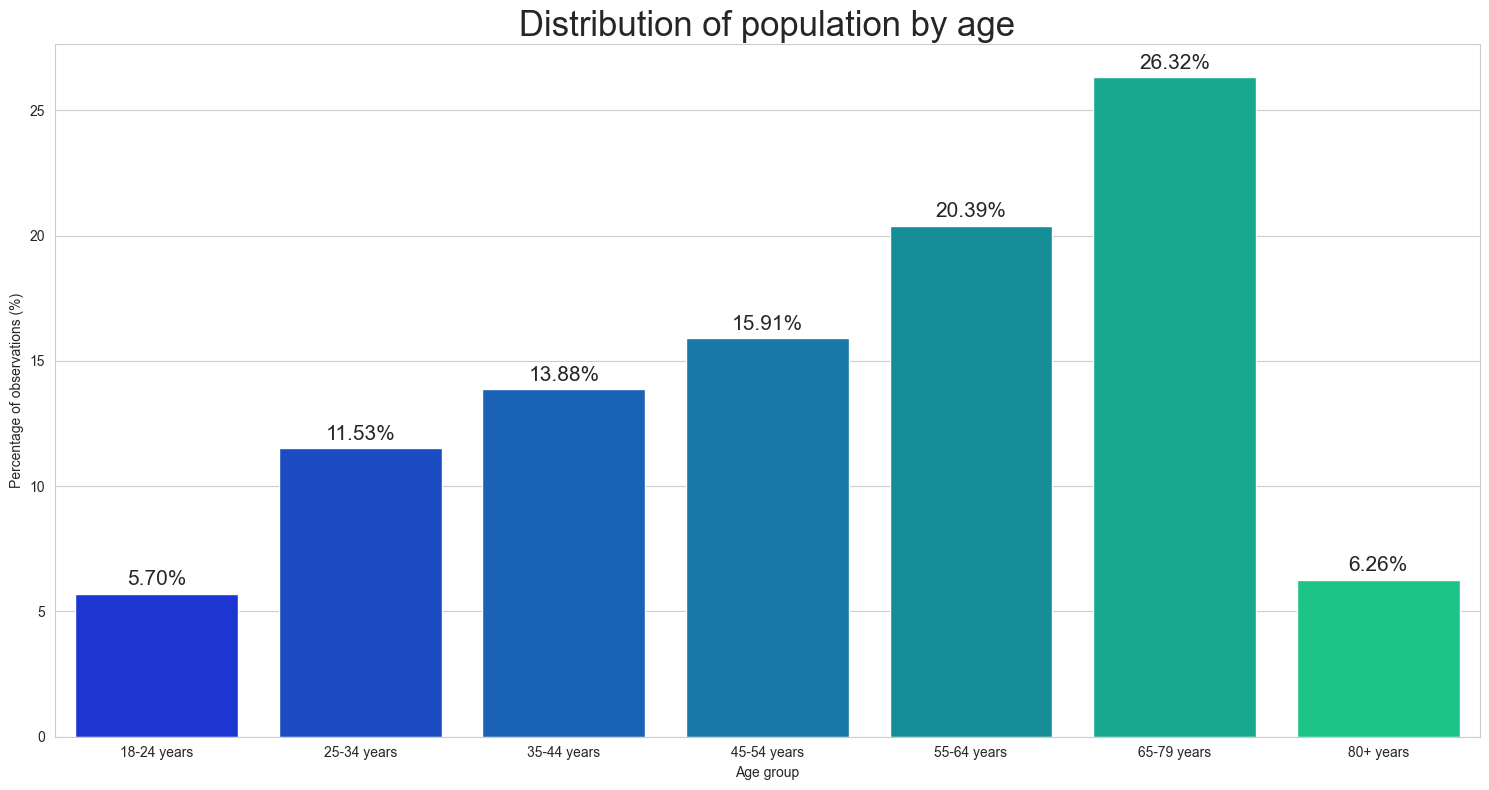

In [14]:
# Reporting of population age in the dataset

total = len(df_prepared_final)
age_percentage = (df_prepared_final['age'].value_counts() / total) * 100
age_percentage = age_percentage.sort_values(ascending = False)
age_order = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-79 years', '80+ years']

plt.figure(figsize=(15, 8))

barplot1 = sns.barplot(x=age_percentage.index, y=age_percentage.values, order=age_order, palette='winter')
plt.title('Distribution of population by age', fontsize=25)
plt.xlabel('Age group')
plt.ylabel('Percentage of observations (%)')
plt.tight_layout()

for p in barplot1.patches:
    height = p.get_height()
    barplot1.annotate(f'{height:.2f}%', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points',
                     fontsize=15)

plt.show()

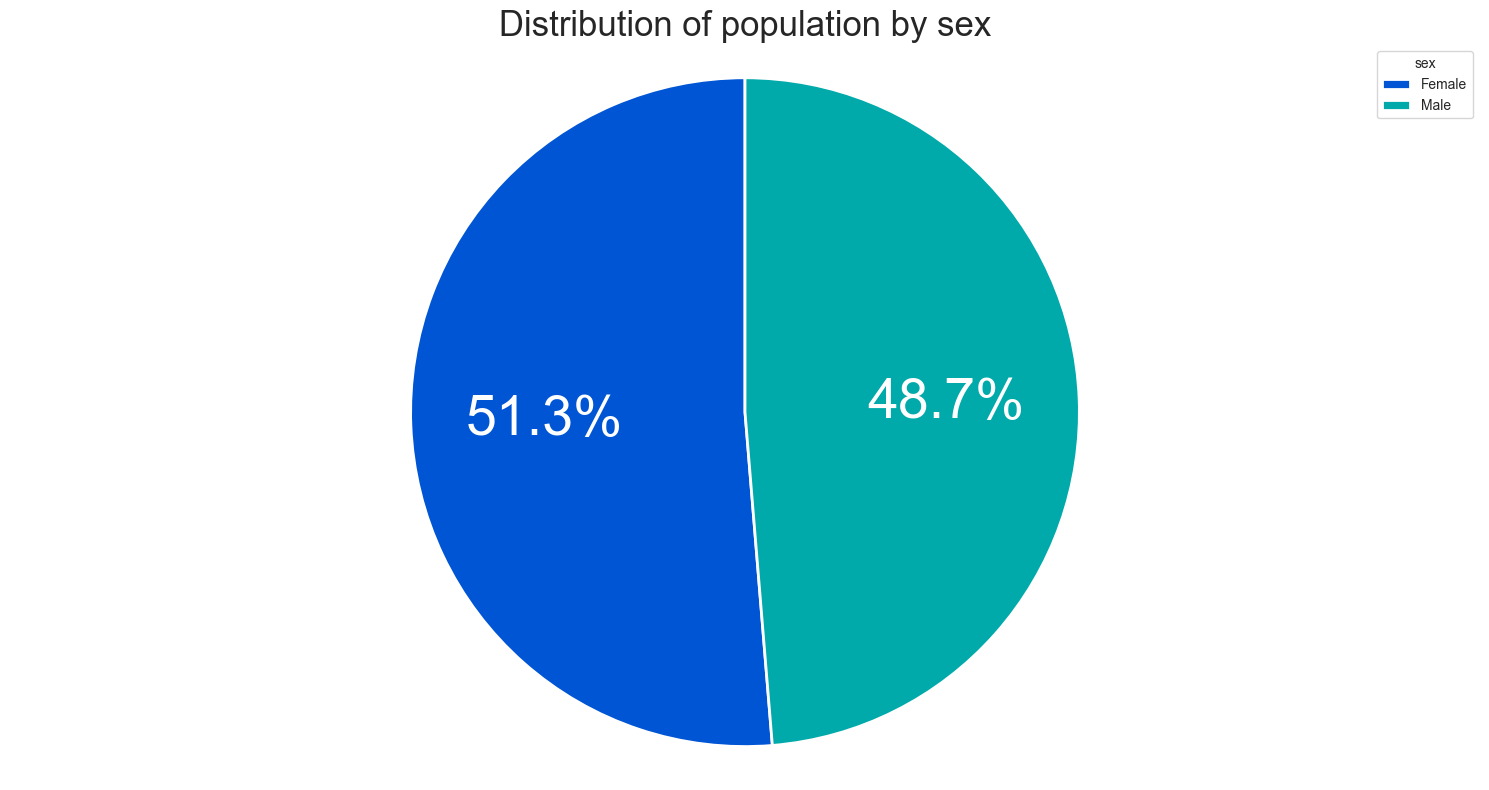

In [15]:
# Reporting of population sex in the dataset

sex_count = df_prepared_final['sex'].value_counts()
sex_count = sex_count.sort_values(ascending = False)
n_colors = len(sex_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
plt.pie(sex_count, labels = sex_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette, 
        textprops={'color': 'white', 'fontsize' : 40}, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Distribution of population by sex', fontsize = 25)
plt.legend(title = 'sex')
plt.tight_layout()
plt.show()

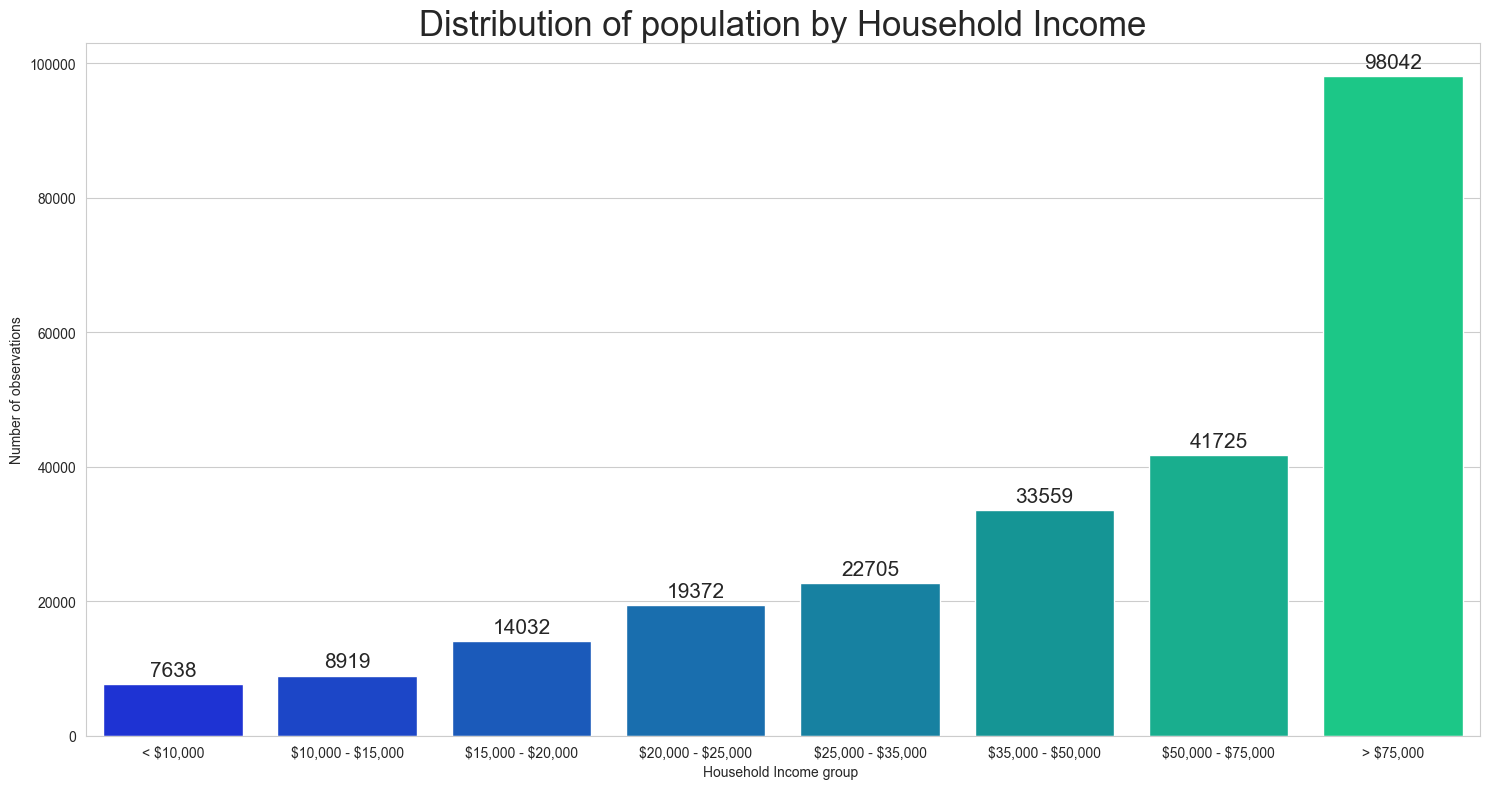

In [16]:
# Reporting of population Household Income in the dataset

household_income_count = df_prepared_final['household_income'].value_counts()
household_income_count = household_income_count.sort_values(ascending = False)
income_order = ['< \$10,000', '\$10,000 - \$15,000', '\$15,000 - \$20,000', '\$20,000 - \$25,000', '\$25,000 - \$35,000', '\$35,000 - \$50,000', '\$50,000 - \$75,000', '> \$75,000']


plt.figure(figsize = (15, 8))
barplot2 = sns.countplot(x = df_prepared_final['household_income'], order = income_order, data = df_prepared_final, palette='winter')
plt.title('Distribution of population by Household Income', fontsize = 25)
plt.xlabel('Household Income group ')
plt.ylabel('Number of observations')
plt.tight_layout()

for p in barplot2.patches:
    barplot2.annotate(format(int(p.get_height())),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize = 15)

plt.show()

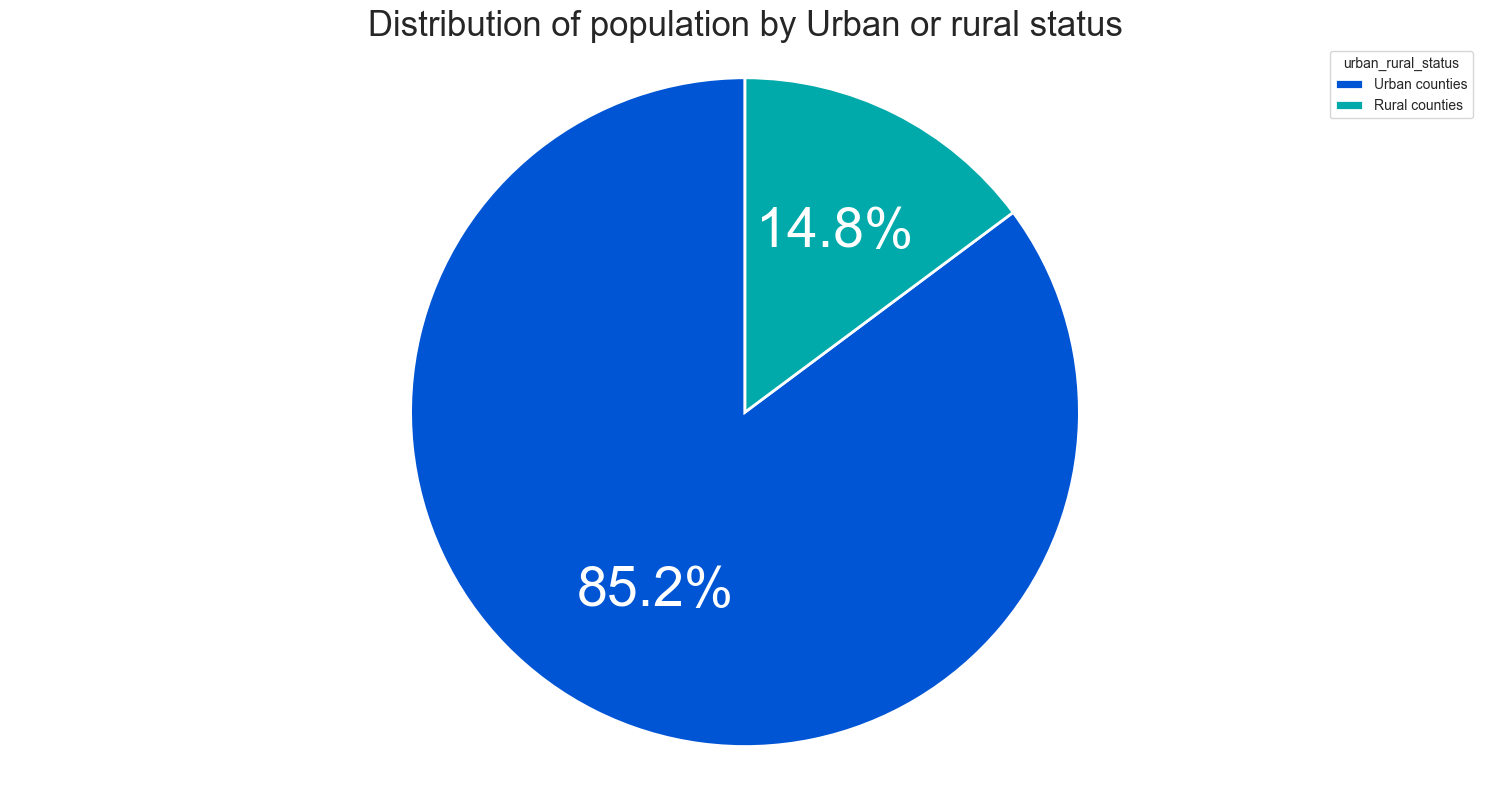

In [18]:
# Reporting of population urban Rural status in the dataset

urban_rural_status_count = df_prepared_final['urban_rural_status'].value_counts()
urban_rural_status_count = urban_rural_status_count.sort_values(ascending = False)
n_colors = len(urban_rural_status_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
plt.pie(urban_rural_status_count, labels = urban_rural_status_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette, 
        textprops = {'color': 'white', 'fontsize' : 40}, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Distribution of population by Urban or rural status', fontsize = 25)
plt.legend(title = 'urban_rural_status')
plt.tight_layout()
plt.show()

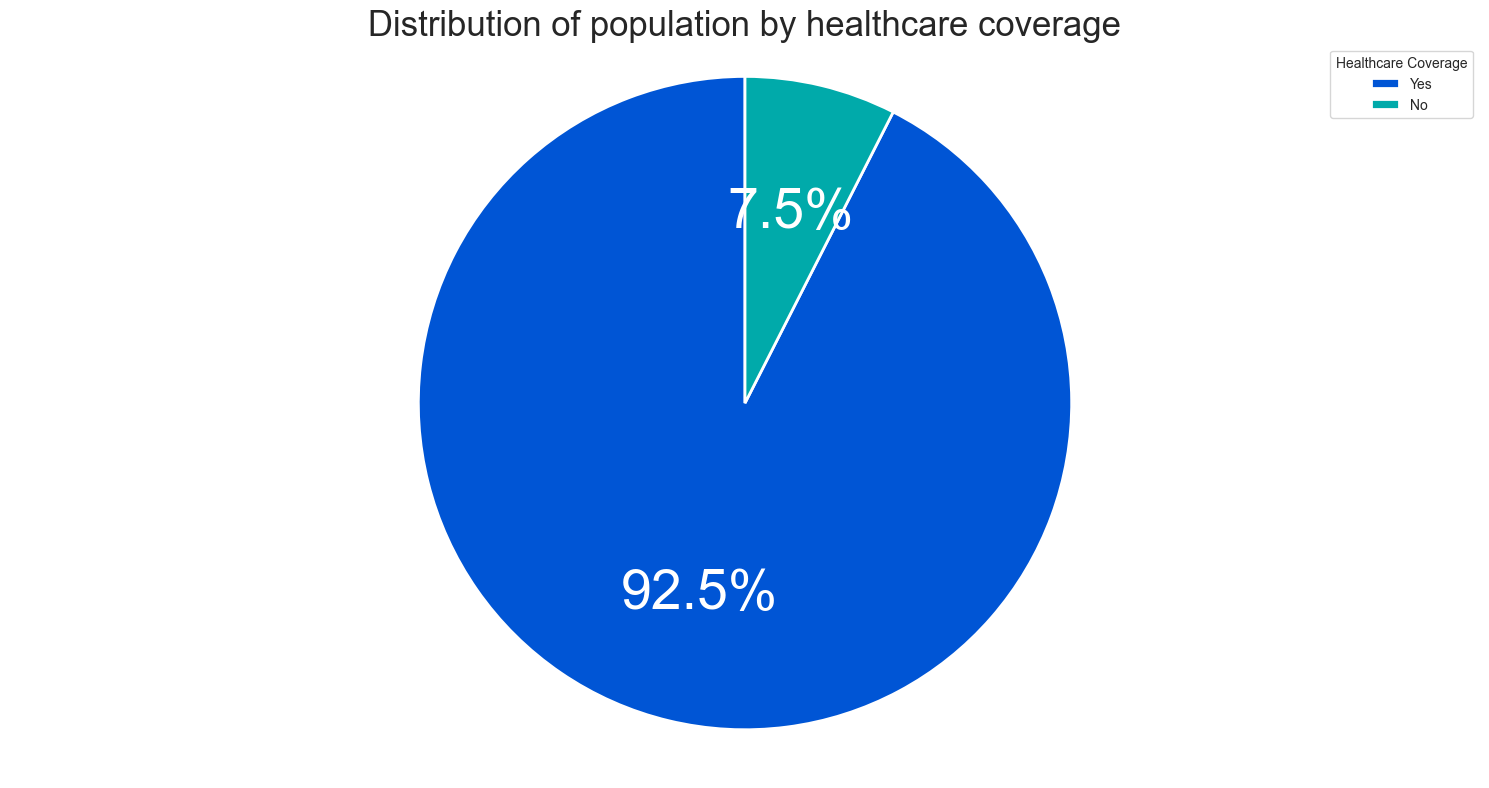

In [19]:
#Reporting of population's health care coverage in the dataset

health_care_count = df_prepared_final['health_care'].value_counts()
health_care_count = health_care_count.sort_values(ascending = False)
n_colors = len(health_care_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
plt.pie(health_care_count, labels = health_care_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette, 
        textprops = {'color': 'white', 'fontsize': 40}, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Distribution of population by healthcare coverage', fontsize = 25)
plt.legend(title = 'Healthcare Coverage')
plt.tight_layout()
plt.show()

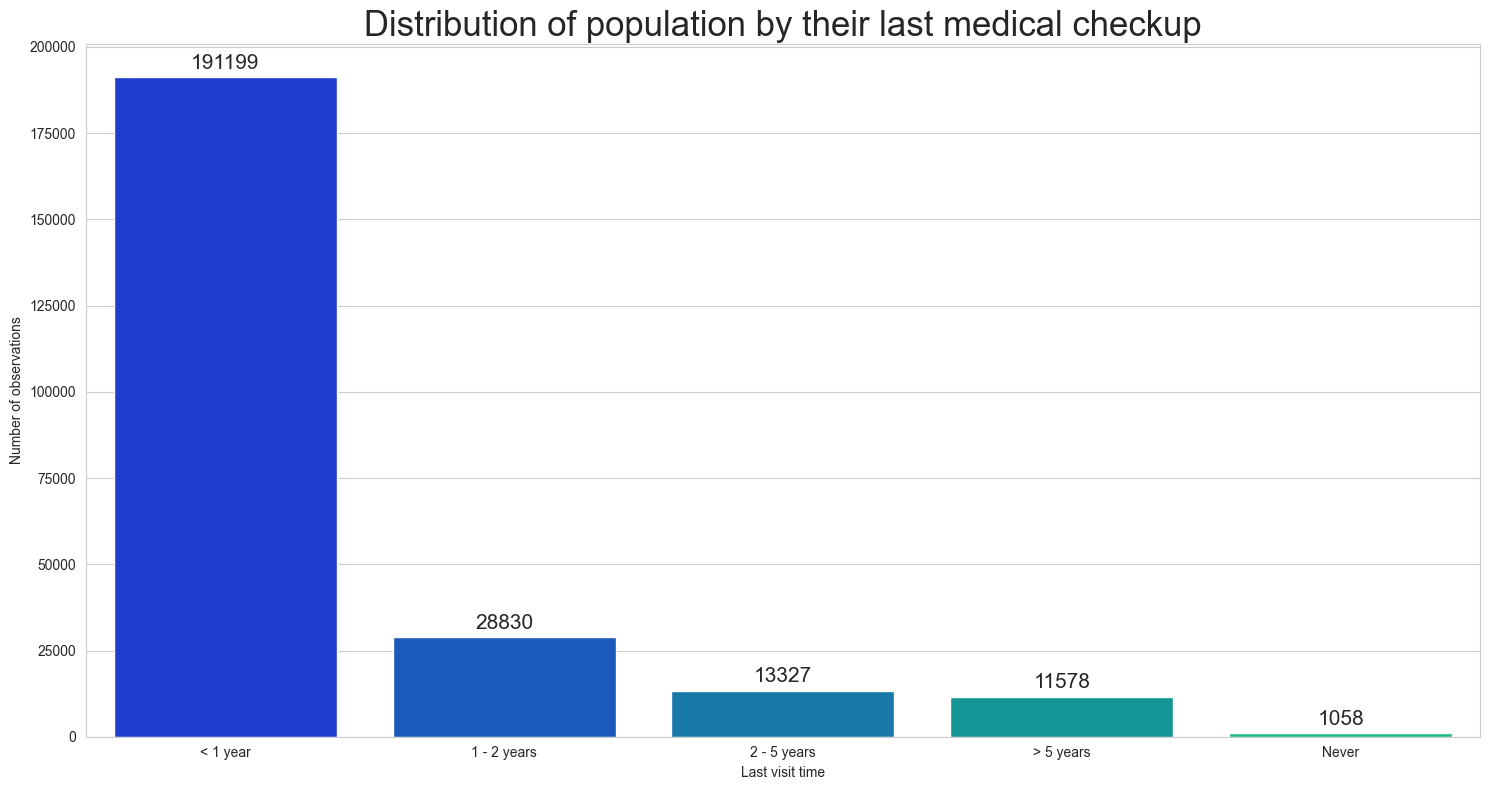

In [20]:
#Reporting of population's last doctor visit in the dataset

doctor_last_visit_counts = df_prepared_final['doctor_last_visit'].value_counts()
doctor_last_visit_counts = doctor_last_visit_counts.sort_values(ascending = False)
n_colors = len(doctor_last_visit_counts)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
barplot3 = sns.countplot(x = df_prepared_final['doctor_last_visit'], order = doctor_last_visit_counts.index, data = df_prepared_final, palette = 'winter')
plt.title('Distribution of population by their last medical checkup', fontsize = 25)
plt.xlabel('Last visit time')
plt.ylabel('Number of observations')
plt.tight_layout()

for p in barplot3.patches:
    barplot3.annotate(format(int(p.get_height())),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points', 
                      fontsize = 15)

plt.show()

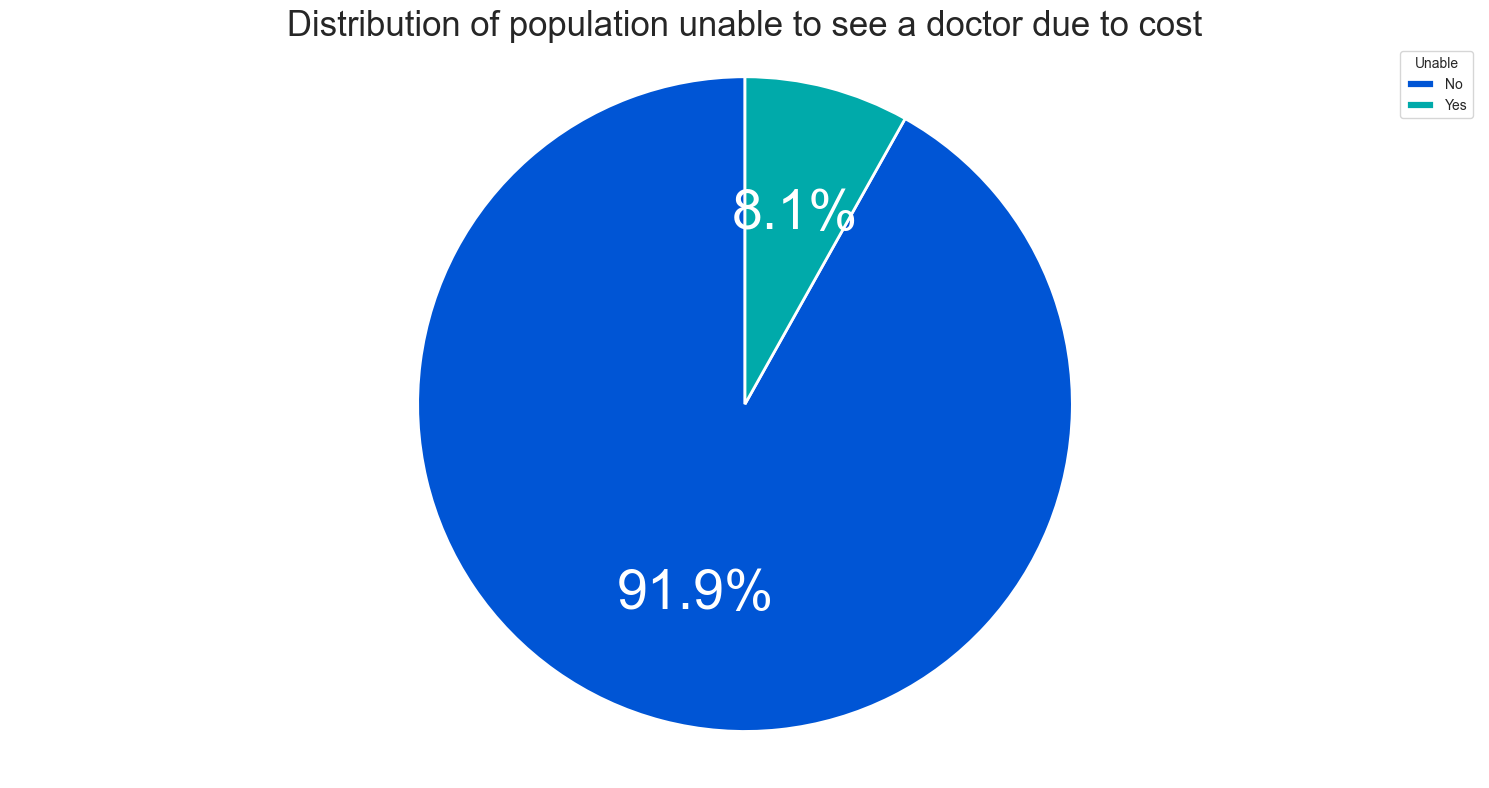

In [21]:
#Reporting of population's medical costs in the Dataset

medical_cost_count = df_prepared_final['medical_cost'].value_counts()
medical_cost_count = medical_cost_count.sort_values(ascending = False)
n_colors = len(medical_cost_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
plt.pie(medical_cost_count, labels = medical_cost_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette,
        textprops = {'color': 'white', 'fontsize': 40}, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Distribution of population unable to see a doctor due to cost', fontsize = 25)
plt.legend(title = 'Unable')
plt.tight_layout()
plt.show()

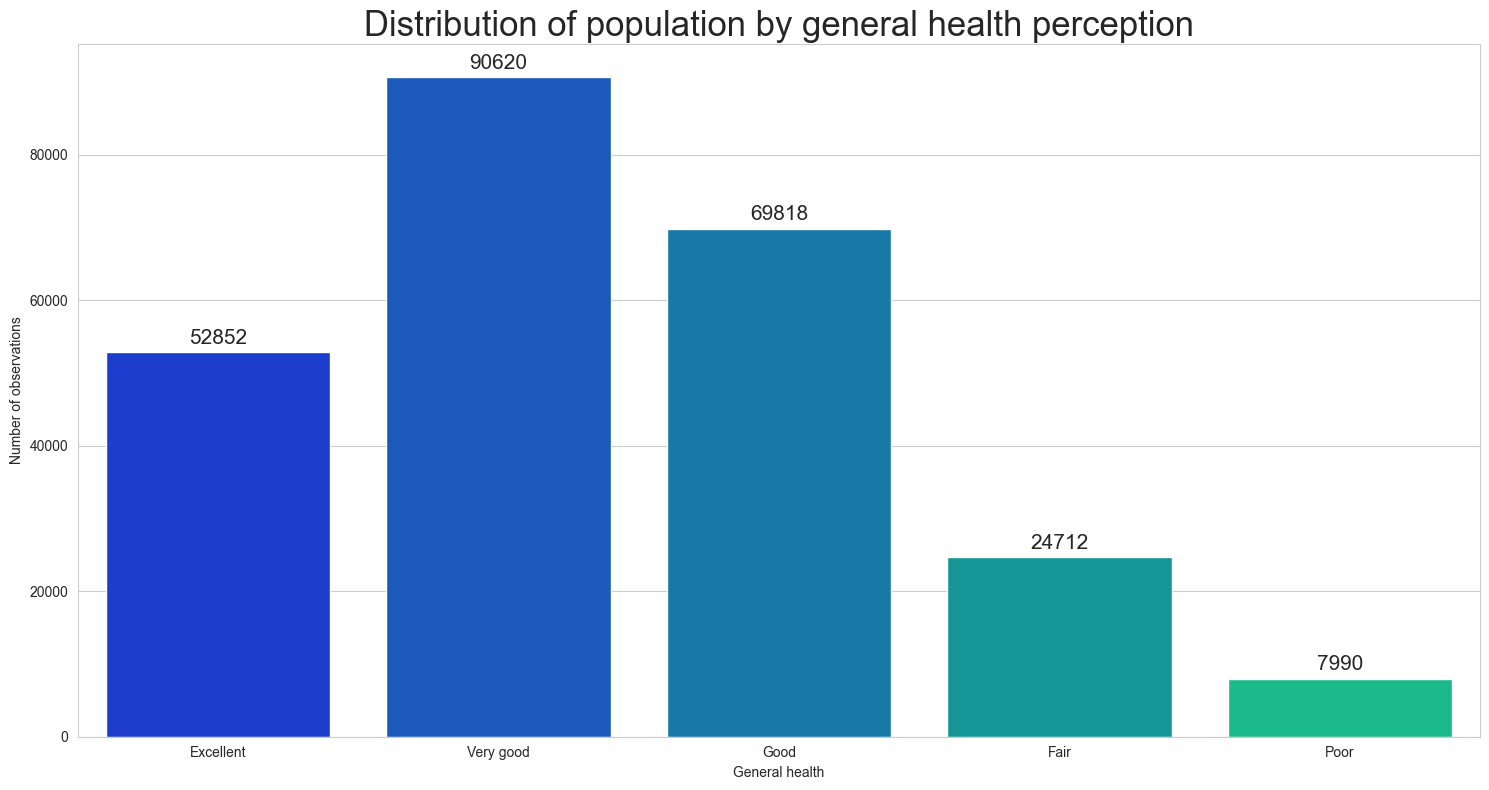

In [22]:
# Reporting of Population's general health perception in the dataset

general_health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

plt.figure(figsize = (15, 8))
barplot4 = sns.countplot(x = df_prepared_final['general_health'], order = general_health_order, data = df_prepared_final, palette = 'winter')
plt.title('Distribution of population by general health perception', fontsize = 25)
plt.xlabel('General health')
plt.ylabel('Number of observations')
plt.tight_layout()

for p in barplot4.patches:
    barplot4.annotate(format(int(p.get_height())),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize = 15)

plt.show()

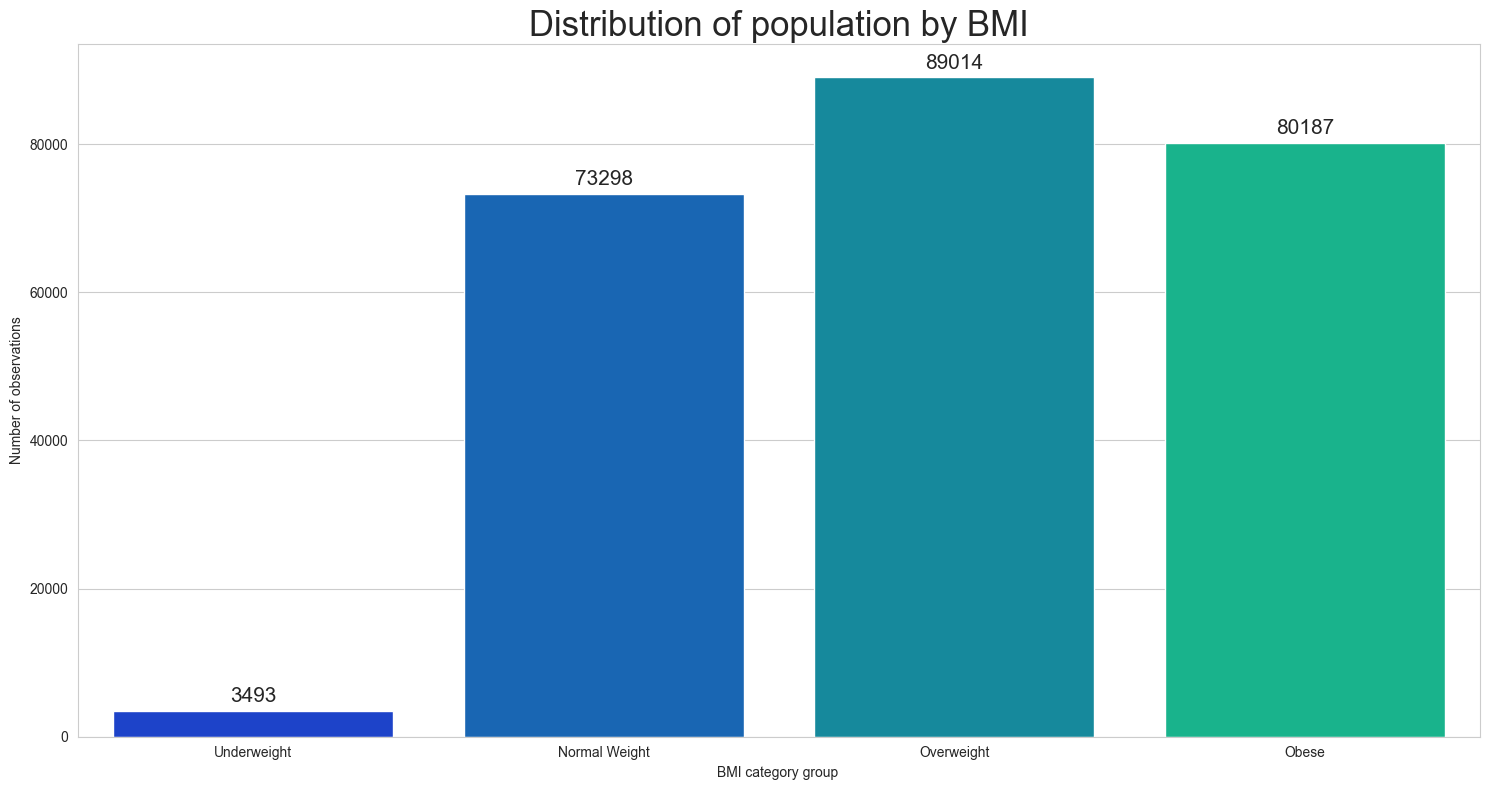

In [23]:
# Reporting of population BMI_category in the dataset

bmi_order = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

plt.figure(figsize = (15, 8))
barplot5 = sns.countplot(x = df_prepared_final['bmi_category'], order = bmi_order, data = df_prepared_final, palette = 'winter')
plt.title('Distribution of population by BMI', fontsize = 25)
plt.xlabel('BMI category group ')
plt.ylabel('Number of observations')
plt.tight_layout()

for p in barplot5.patches:
    barplot5.annotate(format(int(p.get_height())),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize = 15)

plt.show()

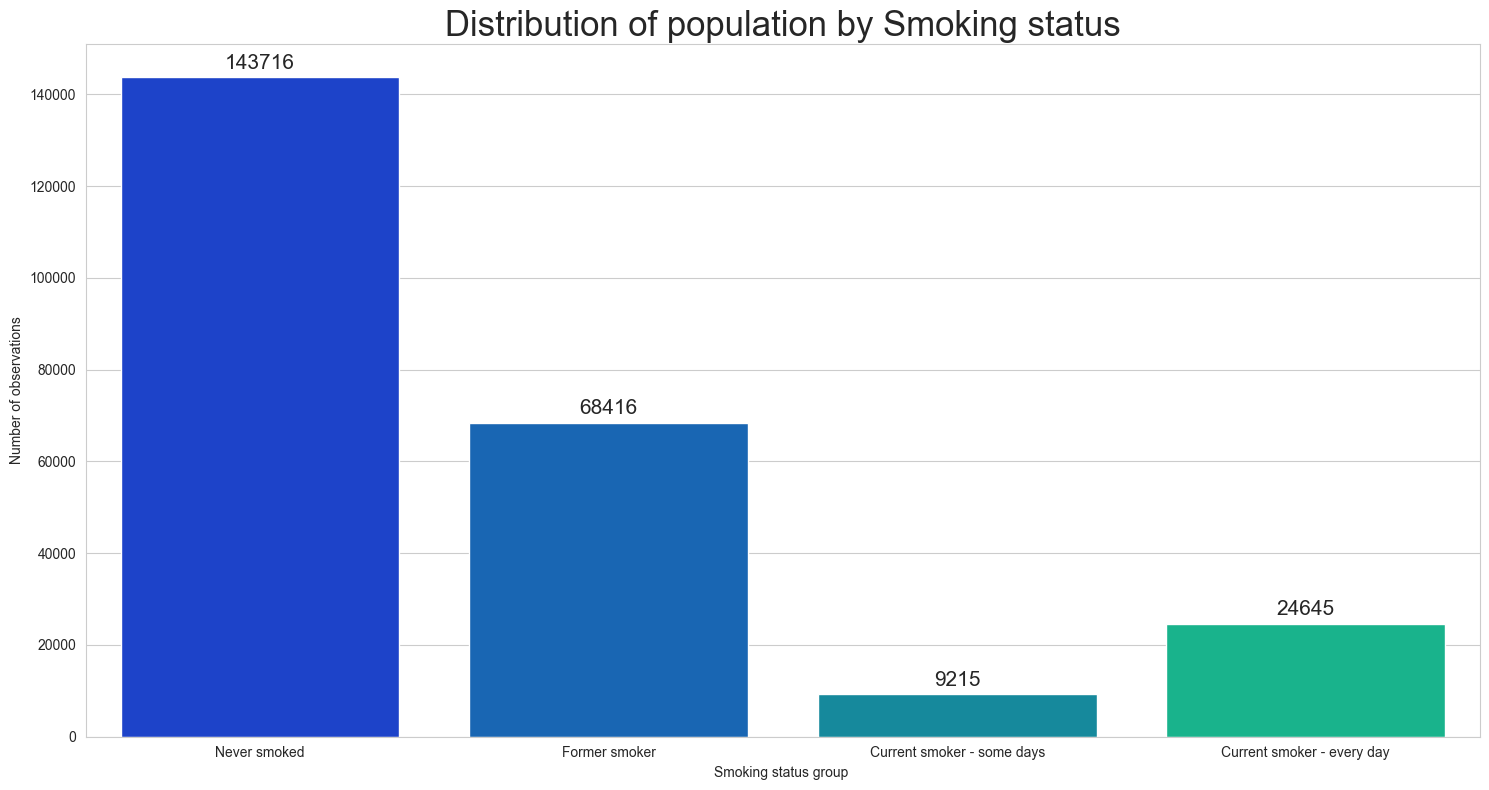

In [24]:
# Reporting of population BMI_category in the dataset

smoker_order = ['Never smoked', 'Former smoker', 'Current smoker - some days', 'Current smoker - every day']

plt.figure(figsize = (15, 8))
barplot6 = sns.countplot(x = df_prepared_final['smoking_status'], order = smoker_order, data = df_prepared_final, palette = 'winter')
plt.title('Distribution of population by Smoking status', fontsize = 25)
plt.xlabel('Smoking status group ')
plt.ylabel('Number of observations')
plt.tight_layout()

for p in barplot6.patches:
    barplot6.annotate(format(int(p.get_height())),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize = 15)

plt.show()

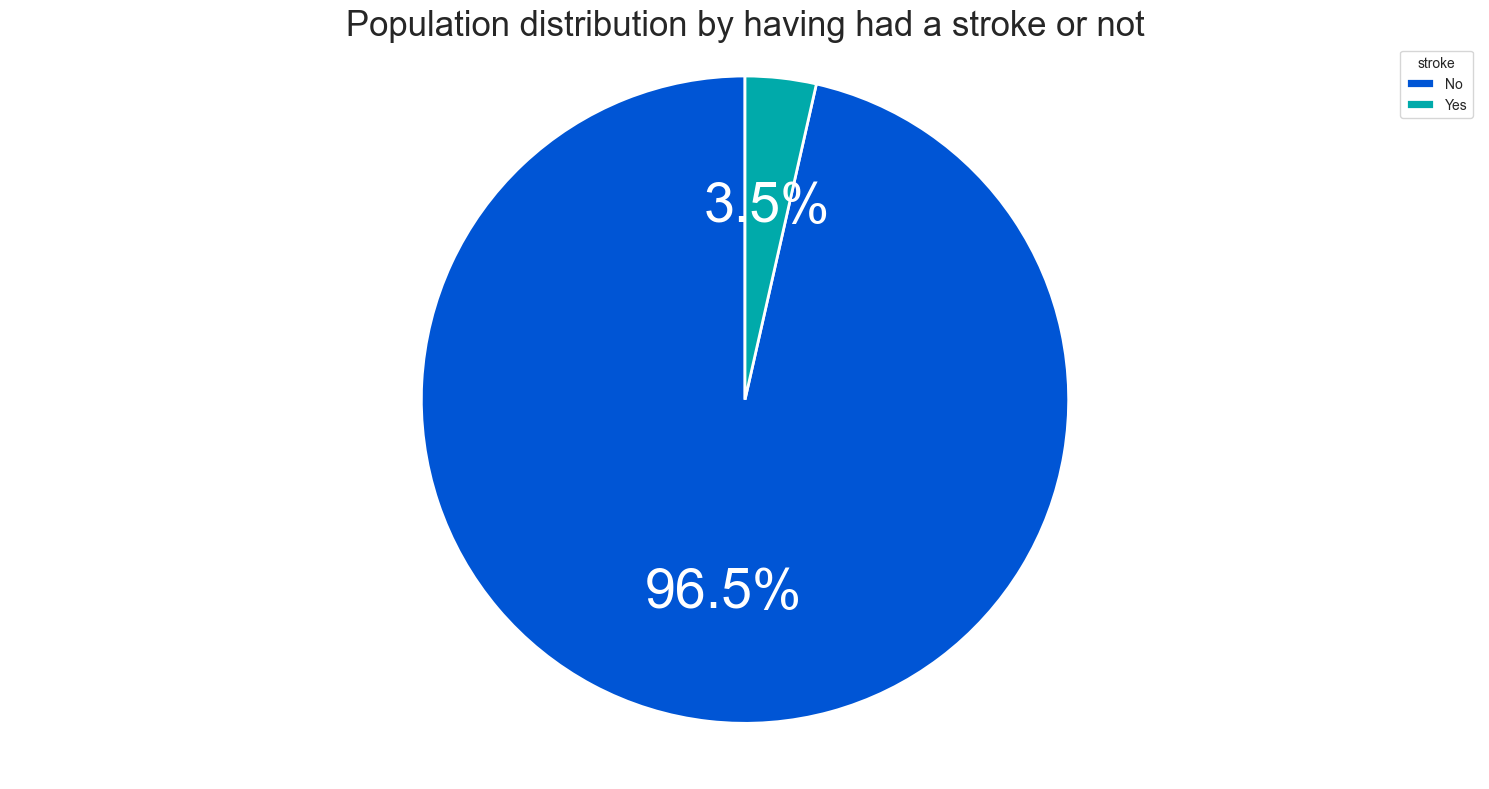

In [25]:
# Reporting of population stroke in the dataset

stroke_count= df_prepared_final['stroke'].value_counts()
stroke_count = stroke_count.sort_values(ascending = False)
n_colors = len(stroke_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
plt.pie(stroke_count, labels = stroke_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette,  textprops = {'color': 'white', 'fontsize' : 40}, 
        wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title("Population distribution by having had a stroke or not", fontsize = 25)
plt.legend(title = 'stroke')
plt.tight_layout()
plt.show()

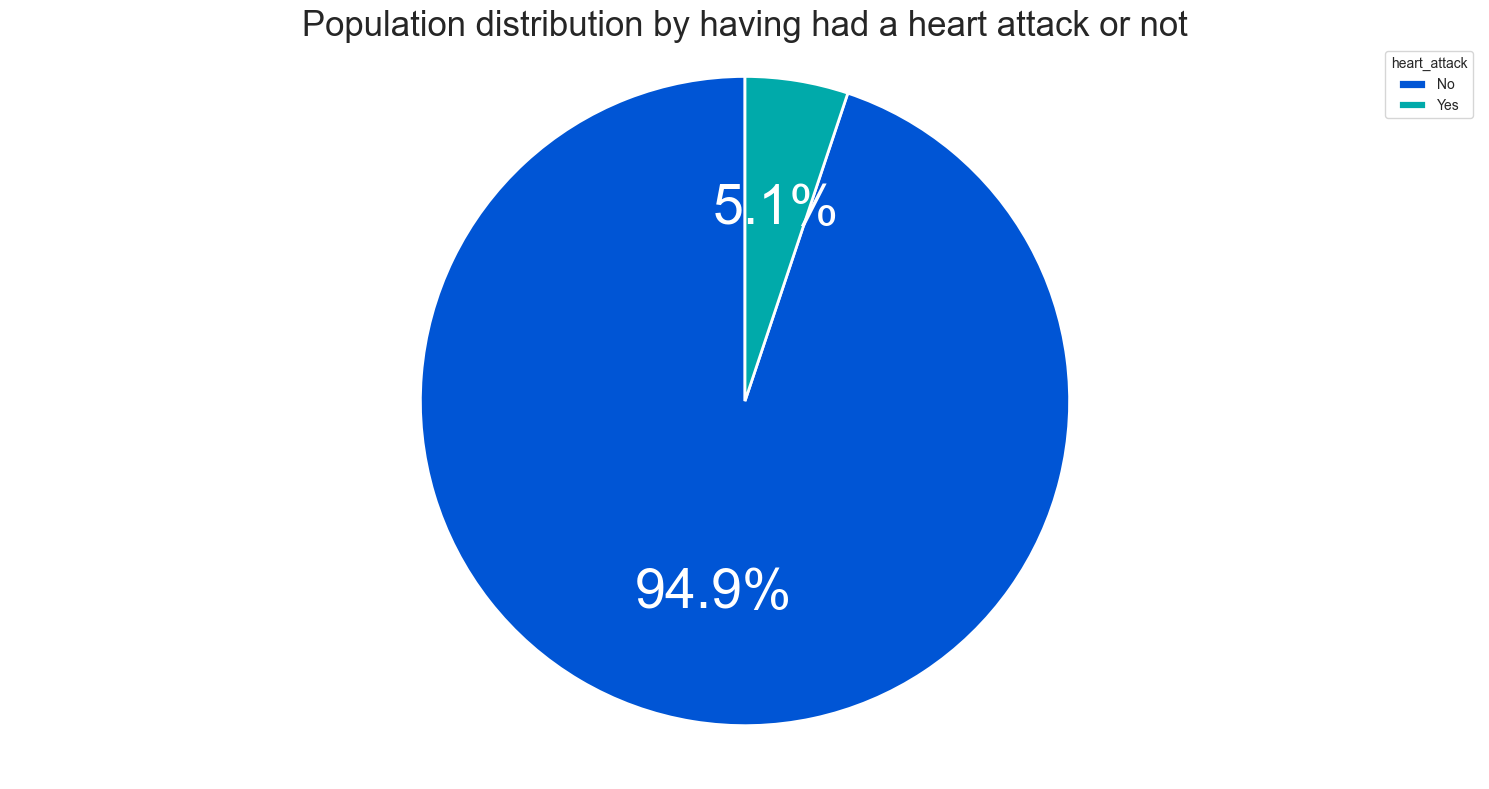

In [26]:
# Reporting of population heart_attack in the dataset

stroke_count= df_prepared_final['heart_attack'].value_counts()
stroke_count = stroke_count.sort_values(ascending = False)
n_colors = len(stroke_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize=(15, 8))
plt.pie(stroke_count, labels = stroke_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette,  textprops = {'color': 'white', 'fontsize' : 40}, 
        wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Population distribution by having had a heart attack or not', fontsize = 25)
plt.legend(title = 'heart_attack')
plt.tight_layout()
plt.show()

### 5. Bivariate Analysis

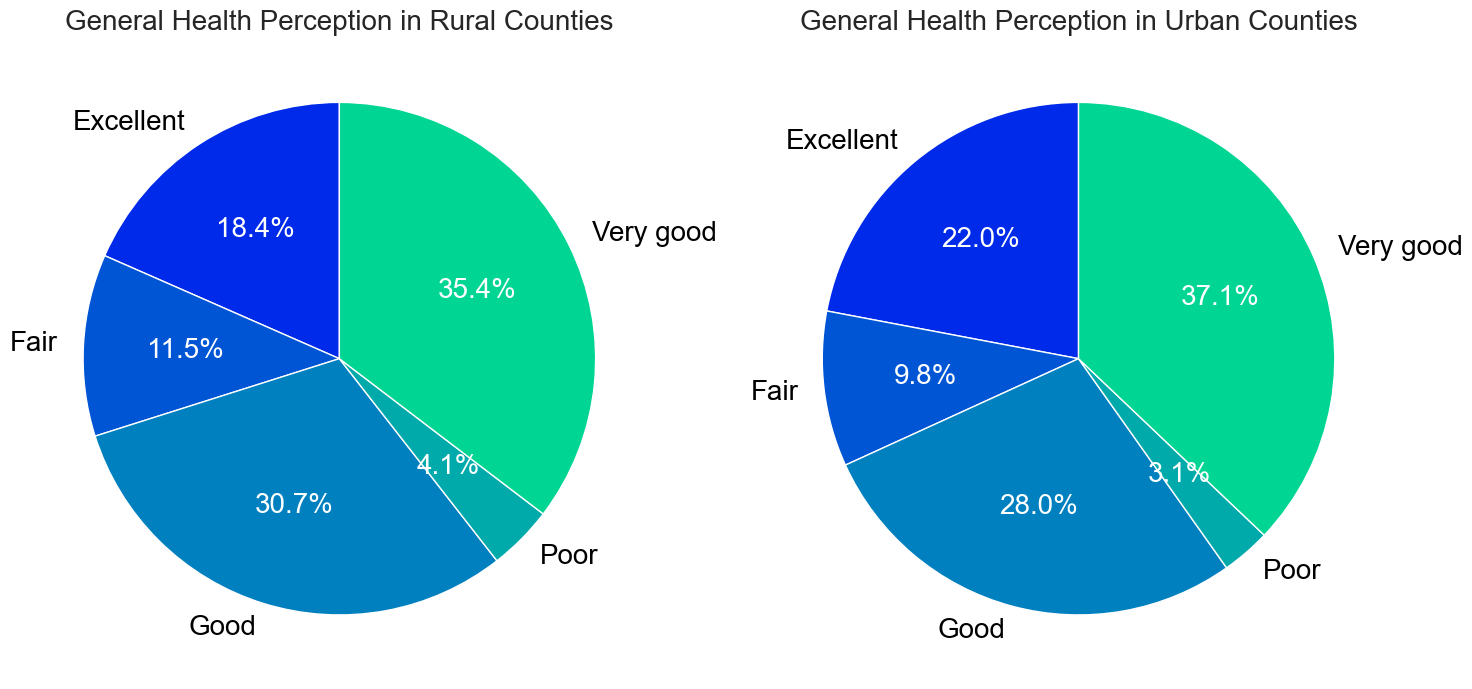

In [27]:
# Create the cross-tabulation to get the total count of people in each group

crosstab_data_urban_health = pd.crosstab(df_prepared_final['urban_rural_status'], df_prepared_final['general_health'])
crosstab_percentages = crosstab_data_urban_health.div(crosstab_data_urban_health.sum(axis = 1), axis = 0) * 100

# Reorder the DataFrame and filter data for each county type

rural_data = crosstab_percentages.loc['Rural counties']
urban_data = crosstab_percentages.loc['Urban counties']

# Generate the pie charts

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
for ax, data, title in zip(axes, [rural_data, urban_data], ['General Health Perception in Rural Counties', 'General Health Perception in Urban Counties']):

    # Generate the pie chart and capture the wedge, text and autotext objects

    wedges, texts, autotexts = ax.pie(data, labels = data.index, autopct = '%1.1f%%', startangle = 90, colors = sns.color_palette('winter', len(data.index)), 
                                      textprops={'color': 'black', 'fontsize': 20}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    
    # Update the color of the percentage texts

    for autotext in autotexts:
        autotext.set_color('white')
    
    # Set the title with customized font size

    ax.set_title(title, fontsize = 20)

# Display the pie charts

plt.tight_layout()
plt.show()


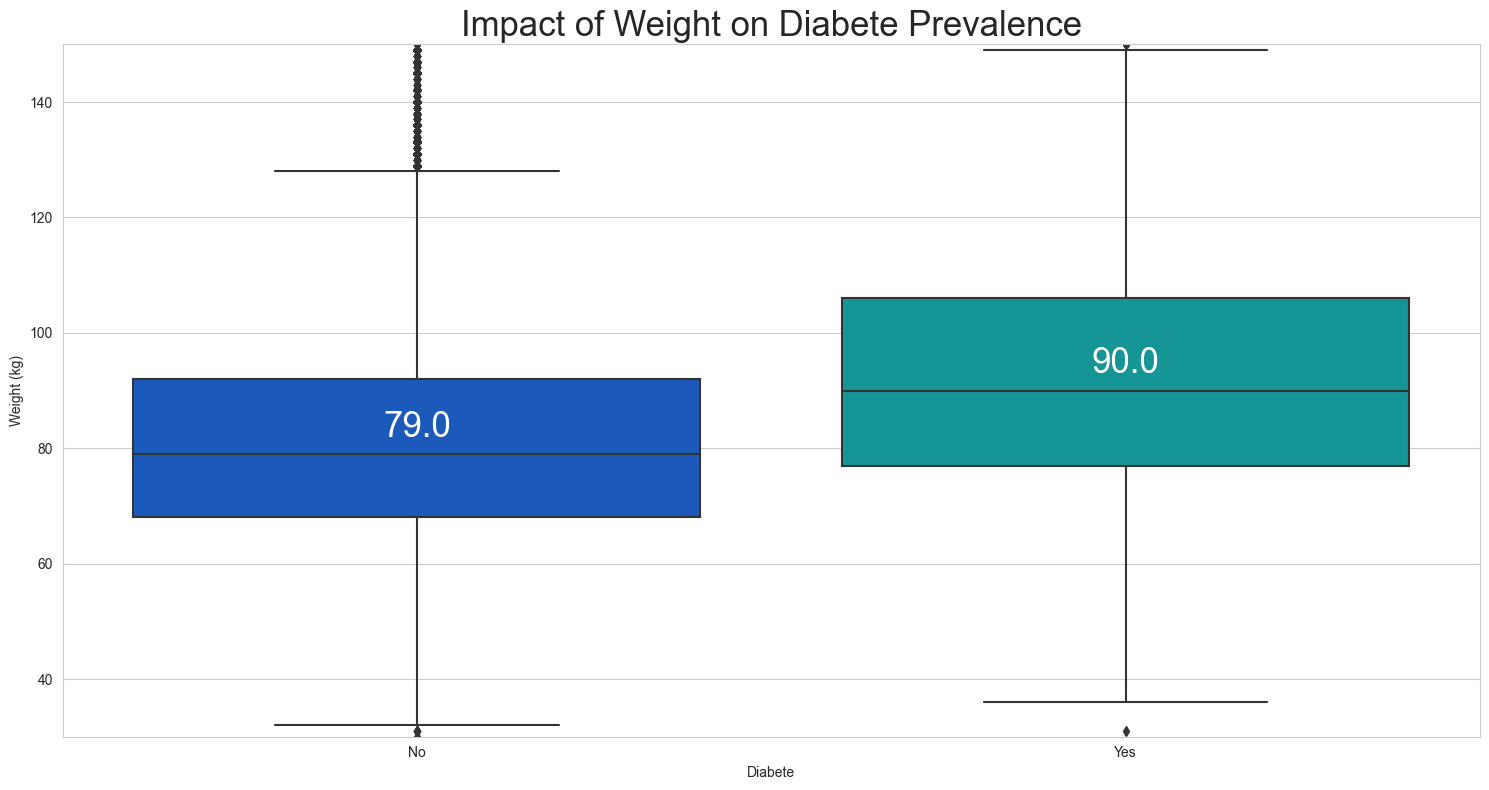

In [28]:
# Relationship between Diabete and Weight

median_weights = df_prepared_final.groupby("diabete")["weight"].median()

plt.figure(figsize = (15, 8))
sns.boxplot(x = "diabete", y = "weight", data = df_prepared_final, palette = 'winter')
plt.title("Impact of Weight on Diabete Prevalence", fontsize = 25)
plt.xlabel("Diabete")
plt.ylabel("Weight (kg)")
plt.ylim(30, 150)

for i, med in enumerate(median_weights):
    plt.annotate(f"{med}", xy = (i, med), xytext = (i, med + 3), fontsize = 25, ha = 'center', color = 'white')

plt.tight_layout()
plt.show()


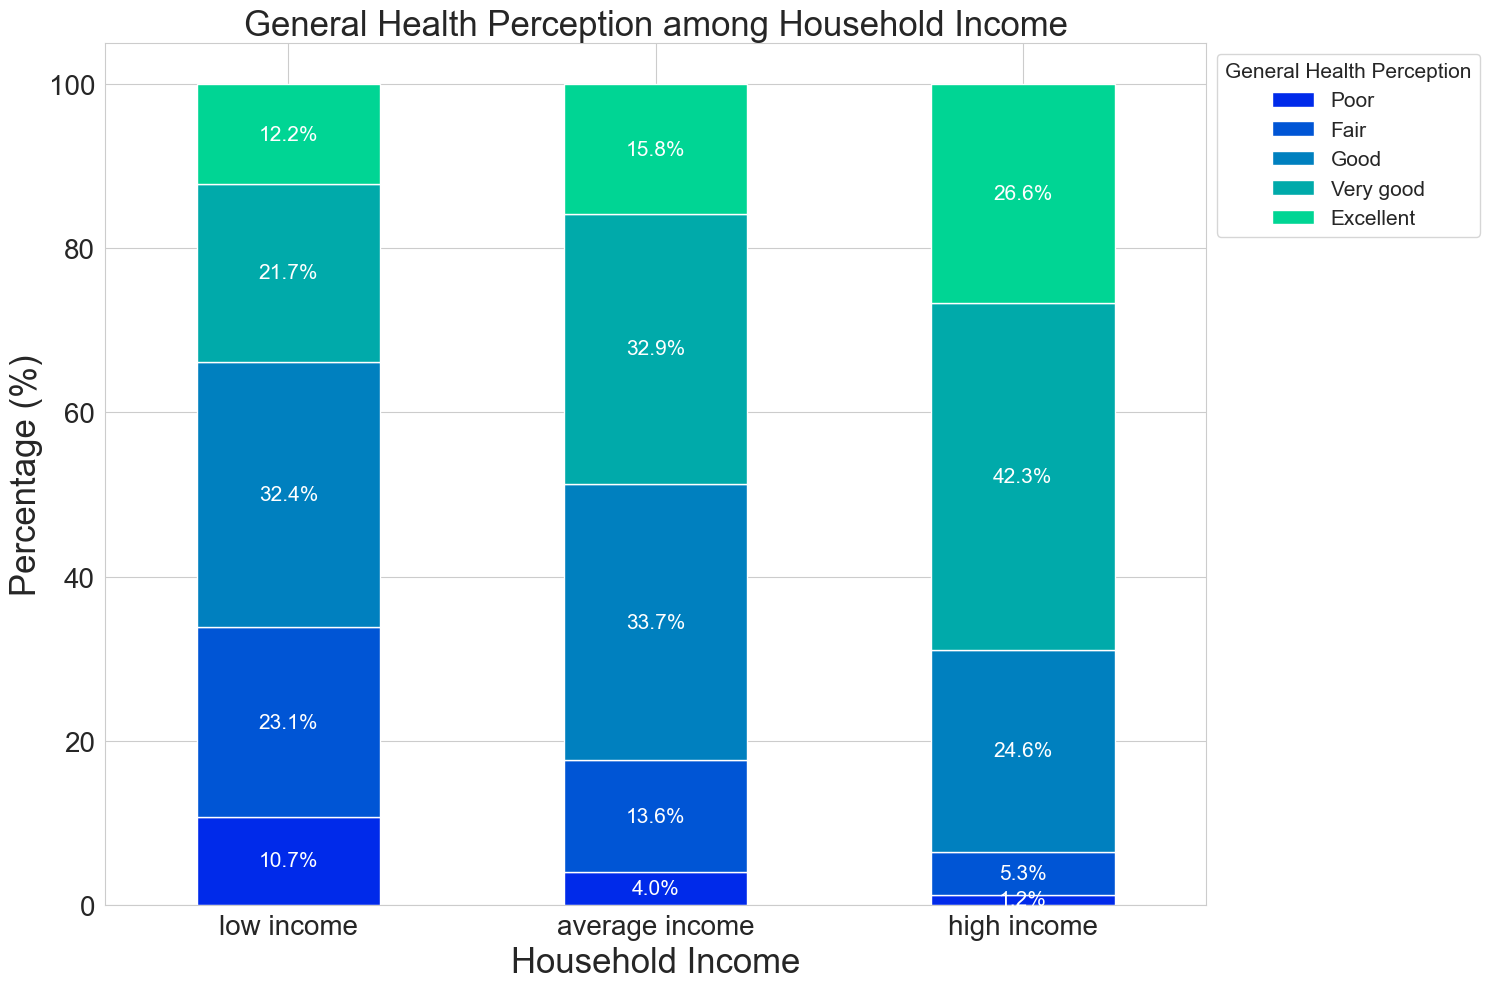

In [36]:
# Modification de la varible household_income
def income_cat(household_income):
    if household_income in ['\$50,000 - \$75,000', '> \$75,000']:
        return "high income"
    elif household_income in ['\$20,000 - \$25,000', '\$25,000 - \$35,000', '\$35,000 - \$50,000']:
        return "average income"
    elif household_income in ['< \$10,000', '\$10,000 - \$15,000', '\$15,000 - \$20,000']:
        return "low income"

df_prepared_final['category_income'] = df_prepared_final['household_income'].apply(income_cat)

# Create the cross-tabulation to get the total count of people in each income group
category_order = ['low income', 'average income', 'high income']
crosstab_data_income_health = pd.crosstab(df_prepared_final['category_income'], df_prepared_final['general_health'])
crosstab_data_income_health = crosstab_data_income_health.reindex(category_order)

# Calculate the percentages for each category in the new cross-tabulation
stacked_data_income = crosstab_data_income_health.div(crosstab_data_income_health.sum(axis = 1), axis = 0) * 100

# Identify missing columns
new_health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
missing_columns = set(new_health_order) - set(stacked_data_income.columns)

# Add missing columns with values of 0
for col in missing_columns:
    stacked_data_income[col] = 0

# Reorder the columns based on 'new_health_order'
stacked_data_income_reordered = stacked_data_income[new_health_order]

# Reverse the color palette for the stacked bar chart
palette = sns.color_palette('winter', len(new_health_order))

# Plot the reordered stacked bar chart with reversed color palette
ax = stacked_data_income_reordered.plot(kind='bar', stacked=True, figsize=(15, 10), color=palette)
plt.xlabel('Household Income', fontsize = 25)
plt.ylabel('Percentage (%)', fontsize = 25)
plt.legend(title='General Health Perception', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=15, title_fontsize=15)
plt.title('General Health Perception among Household Income', fontsize=25)
plt.xticks(rotation=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add percentage annotations on each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=15, color='white')

plt.tight_layout()
plt.show()

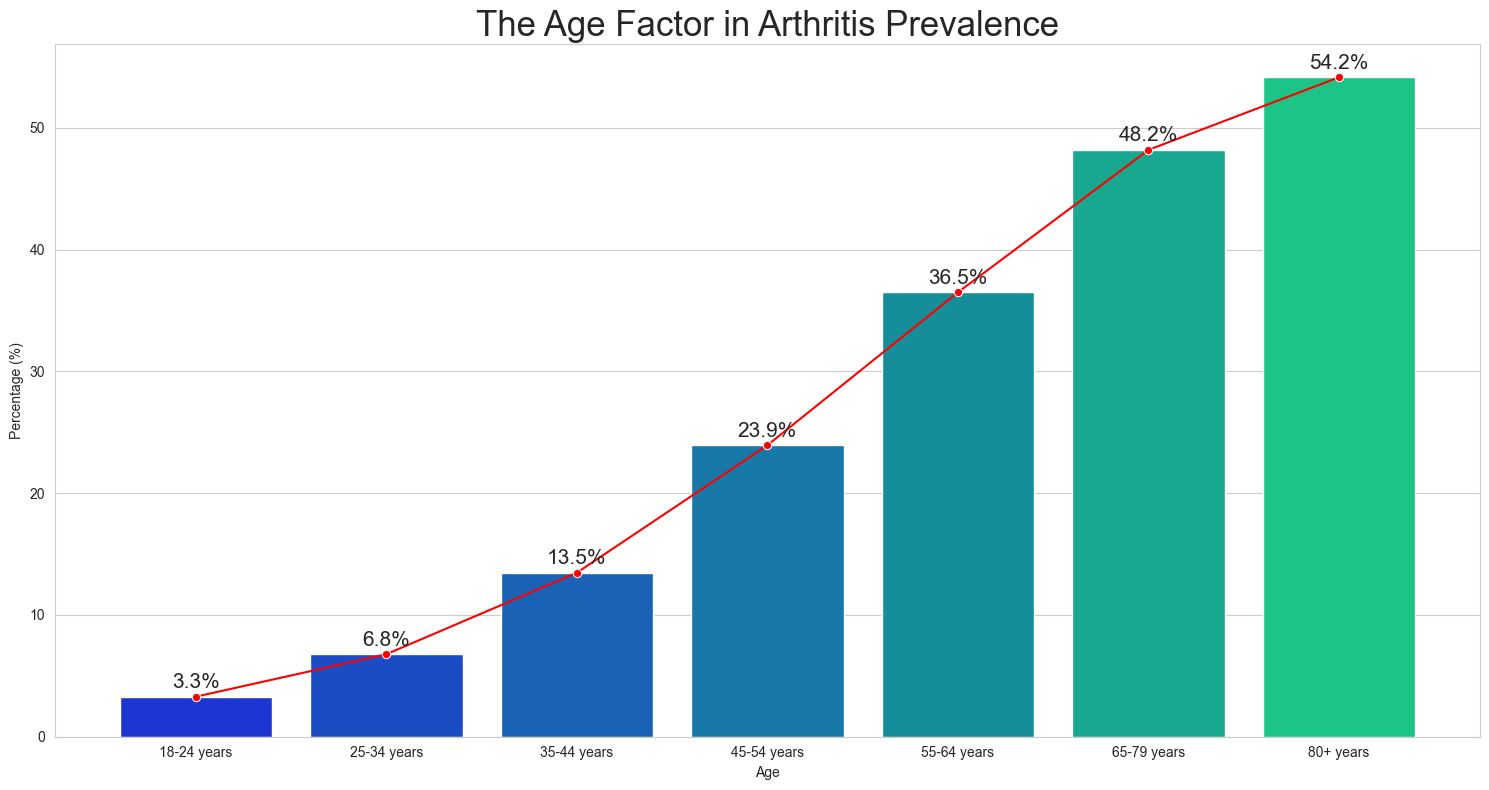

In [30]:
# Create the cross-tabulation to get the total count of people in each age group

crosstab_data_age_arthritis = pd.crosstab(df_prepared_final['age'], df_prepared_final['arthritis'])

# Calculate the percentages for each category in the cross-tabulation

crosstab_percentages_age_arthritis = crosstab_data_age_arthritis.div(crosstab_data_age_arthritis.sum(axis = 1), axis = 0) * 100

# Reorder the DataFrame based on the specified age order

age_order = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-79 years', '80+ years']
age_colors = sns.color_palette('winter', len(age_order))
crosstab_percentages_age_arthritis = crosstab_percentages_age_arthritis.loc[age_order]

# Plot the bar chart with percentages

plt.figure(figsize = (15, 8))
barplot_age_arthritis = sns.barplot(x = crosstab_percentages_age_arthritis.index, y = 'Yes', data = crosstab_percentages_age_arthritis, palette = age_colors)
plt.title("The Age Factor in Arthritis Prevalence", fontsize = 25)
plt.xlabel("Age")
plt.ylabel("Percentage (%)")
plt.tight_layout()

# Add a line plot to represent the percentage of 'Yes' for arthritis in each age group

sns.lineplot(x = crosstab_percentages_age_arthritis.index, y = 'Yes', data = crosstab_percentages_age_arthritis, marker = 'o', color = 'red')

# Annotate the bars with the percentages

for p in barplot_age_arthritis.patches:
    barplot_age_arthritis.annotate(f'{p.get_height():.1f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize = 15, rotation = 0)

plt.show()


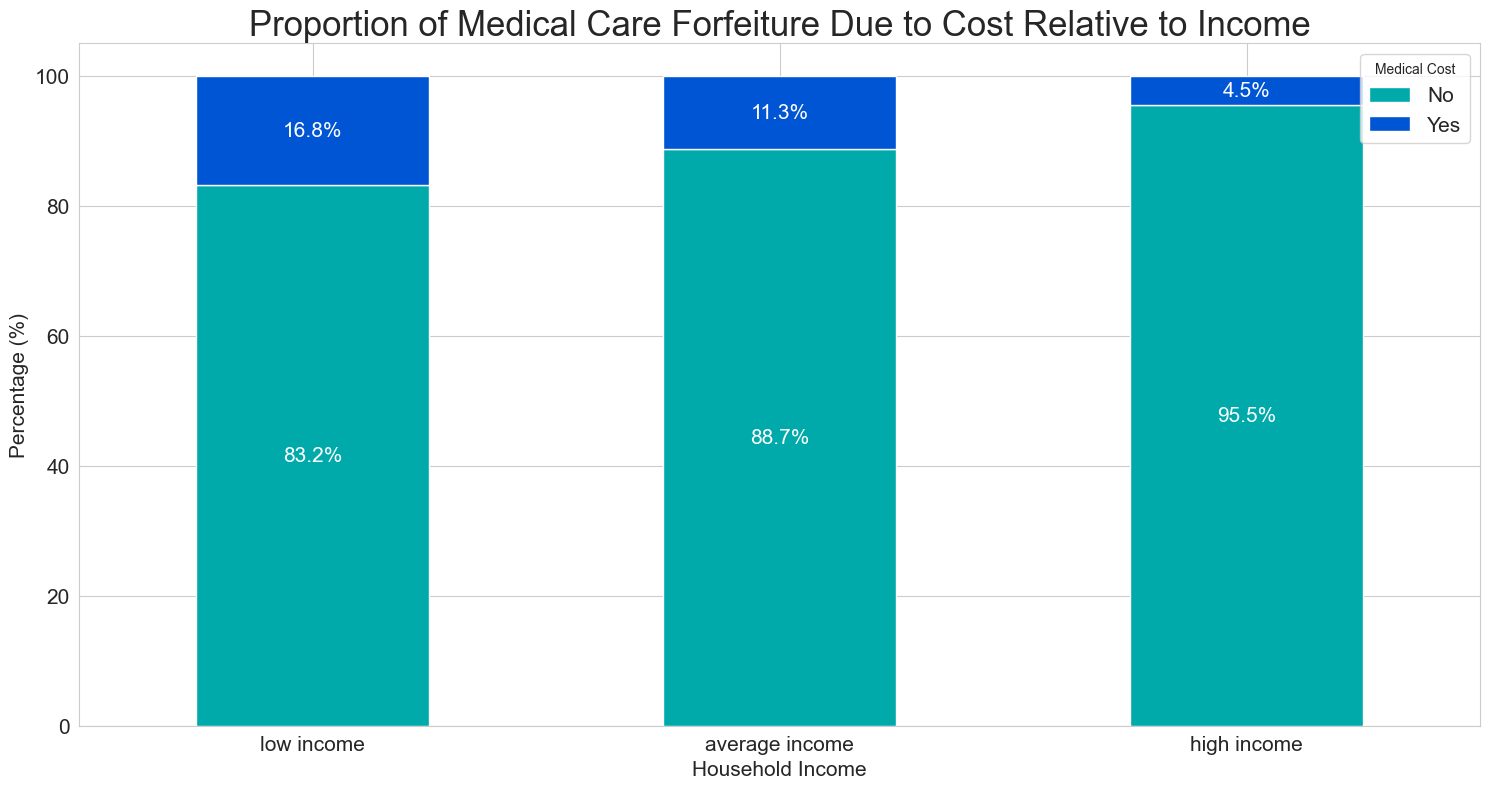

In [37]:
#medical_cost by household_income

# Modification de la varible household_income
def income_cat(household_income):
    if household_income in ['\$50,000 - \$75,000', '> \$75,000']:
        return "high income"
    elif household_income in ['\$20,000 - \$25,000', '\$25,000 - \$35,000', '\$35,000 - \$50,000']:
        return "average income"
    elif household_income in ['< \$10,000', '\$10,000 - \$15,000', '\$15,000 - \$20,000']:
        return "low income"

df_prepared_final['category_income'] = df_prepared_final['household_income'].apply(income_cat)

# On ordonne category_income
category_order = ['low income', 'average income', 'high income'] # Création de l'ordre
df_prepared_final['category_income'].astype(pd.CategoricalDtype(categories=category_order, ordered=False)) # Modification de l'ordre dans la colonne category_income

# On crée le crosstab pour les variables category_income et medical_cost
categoryincome_medical_crosstab = pd.crosstab(df_prepared_final['category_income'], df_prepared_final['medical_cost'], normalize='index') * 100
categoryincome_medical_crosstab = categoryincome_medical_crosstab.reindex(category_order)
# Reverse the color palette for the stacked bar chart
reversed_color_palette = sns.color_palette('winter', len(categoryincome_medical_crosstab.columns))[::-1]

# Plot the reordered stacked bar chart with reversed color palette
ax = categoryincome_medical_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8), color=reversed_color_palette)

# Add labels and title
plt.xlabel('Household Income', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title('Proportion of Medical Care Forfeiture Due to Cost Relative to Income', fontsize=25)
plt.legend(title='Medical Cost', loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=15)

# Add percentage annotations on each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:  # to avoid annotating empty bars
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=15, color='white')
plt.xticks(rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

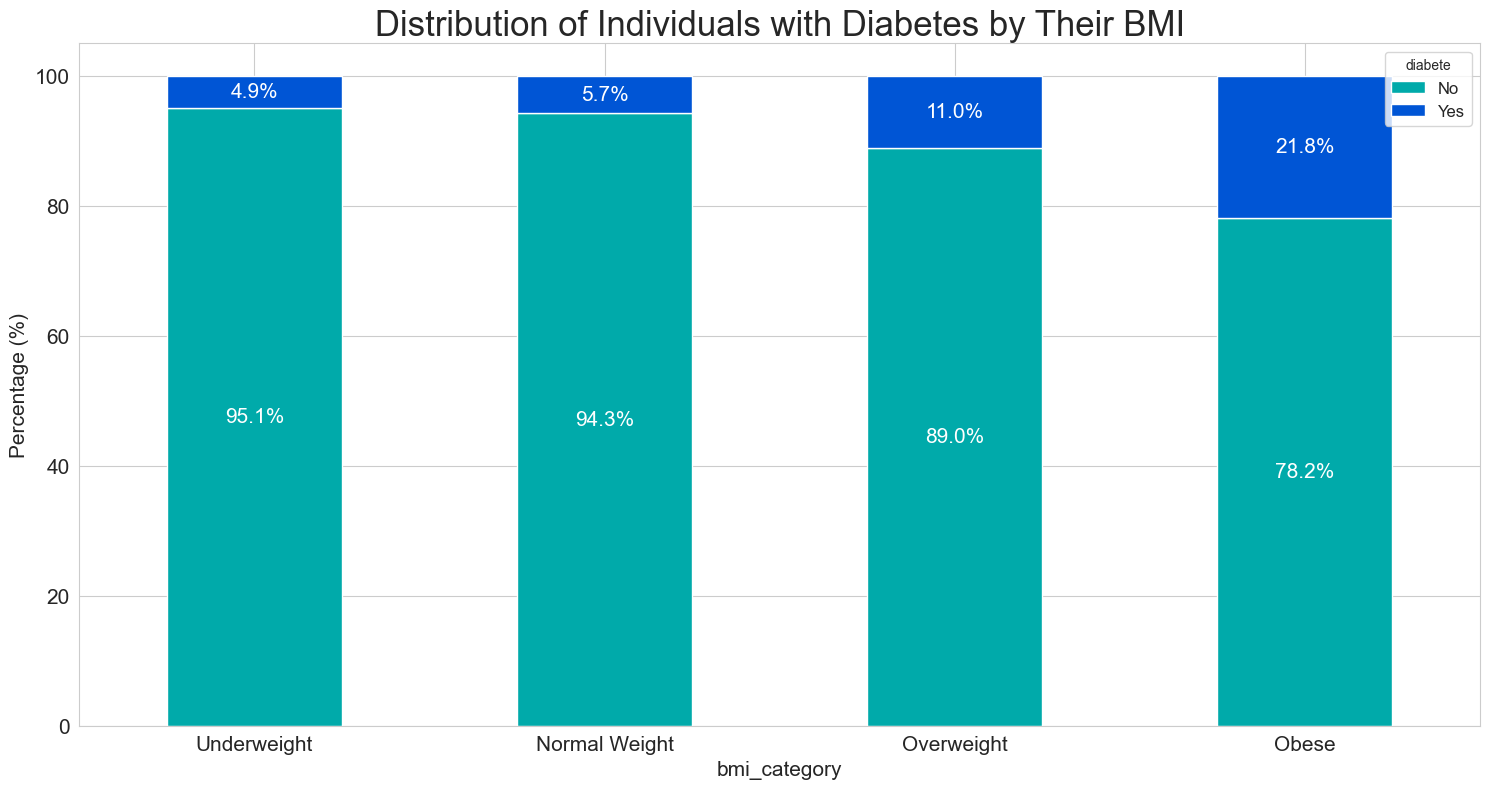

In [38]:
# diabete by bmi_category

# On ordonne bmi_order
bmi_order = ['Underweight', 'Normal Weight', 'Overweight', 'Obese'] # Création de l'ordre
df_prepared_final['bmi_category'].astype(pd.CategoricalDtype(categories=bmi_order, ordered=True)) # Modification de l'ordre dans la colonne category_income

# On crée le crosstab pour les variables category_income et medical_cost
bmi_diabete_crosstab = pd.crosstab(df_prepared_final['bmi_category'], df_prepared_final['diabete'], normalize='index') * 100
bmi_diabete_crosstab = bmi_diabete_crosstab.reindex(bmi_order)

# Reverse the color palette for the stacked bar chart
reversed_color_palette = sns.color_palette('winter', len(bmi_diabete_crosstab.columns))[::-1]

# Plot the reordered stacked bar chart with reversed color palette
figure11 = bmi_diabete_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8), color=reversed_color_palette)

# Add labels and title
plt.xlabel('bmi_category', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title('Distribution of Individuals with Diabetes by Their BMI', fontsize=25)

# Add percentage annotations on each bar segment
for p in figure11.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:  # to avoid annotating empty bars
        figure11.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=15, color='white')
plt.legend(title='diabete', loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.xticks(rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

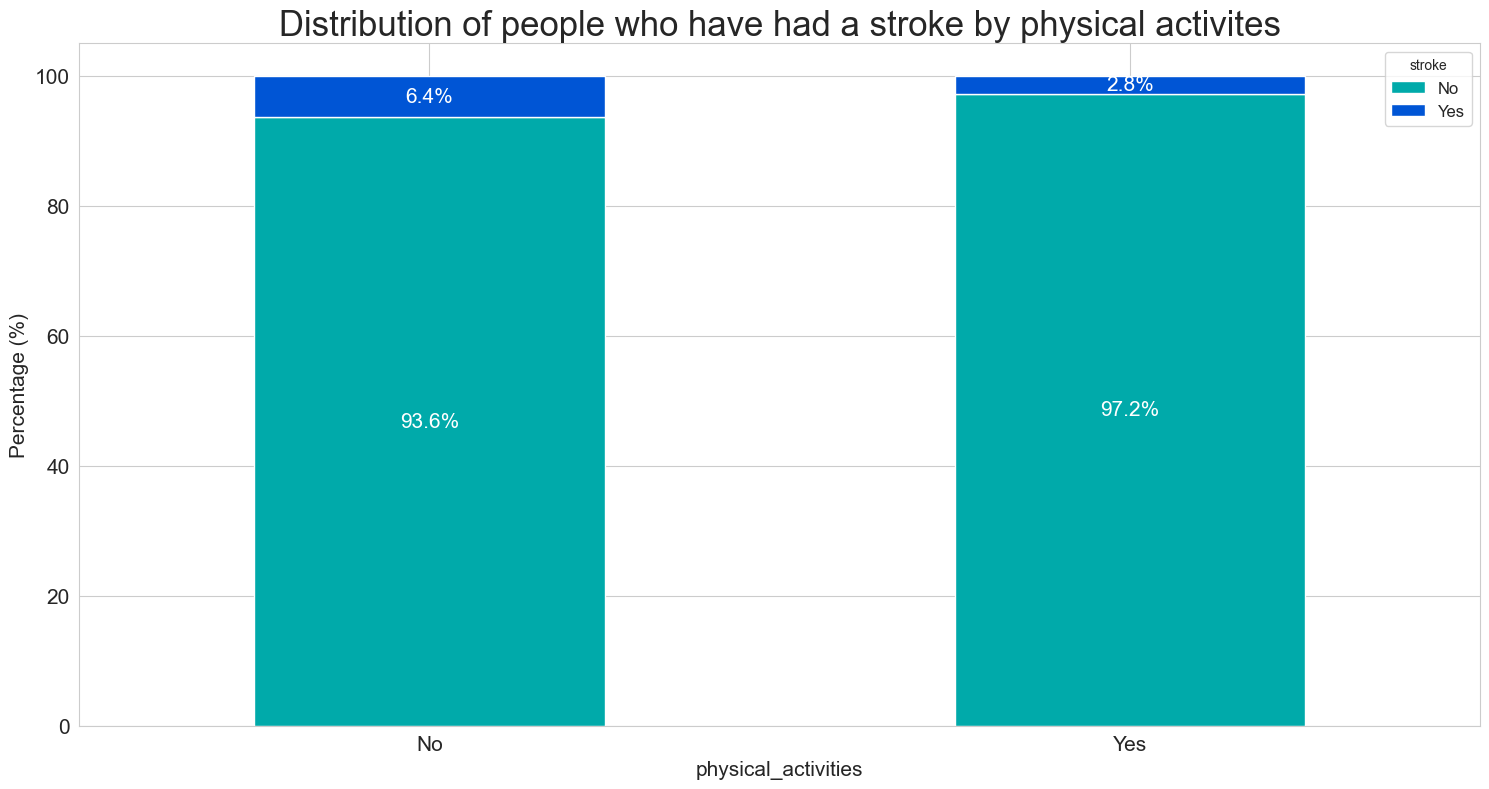

In [39]:
# stroke by physical_activities

# On crée le crosstab pour les variables physical_activities et stroke
physicalact_stroke_crosstab = pd.crosstab(df_prepared_final['physical_activities'], df_prepared_final['stroke'], normalize='index') * 100

# Reverse the color palette for the stacked bar chart
reversed_color_palette = sns.color_palette('winter', len(physicalact_stroke_crosstab.columns))[::-1]

# Plot the reordered stacked bar chart with reversed color palette
figure12 = physicalact_stroke_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8), color=reversed_color_palette)

# Add labels and title
plt.xlabel('physical_activities', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title('Distribution of people who have had a stroke by physical activites', fontsize=25)

# Add percentage annotations on each bar segment
for p in figure12.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:  # to avoid annotating empty bars
        figure12.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=15, color='white')
plt.legend(title='stroke', loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.xticks(rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

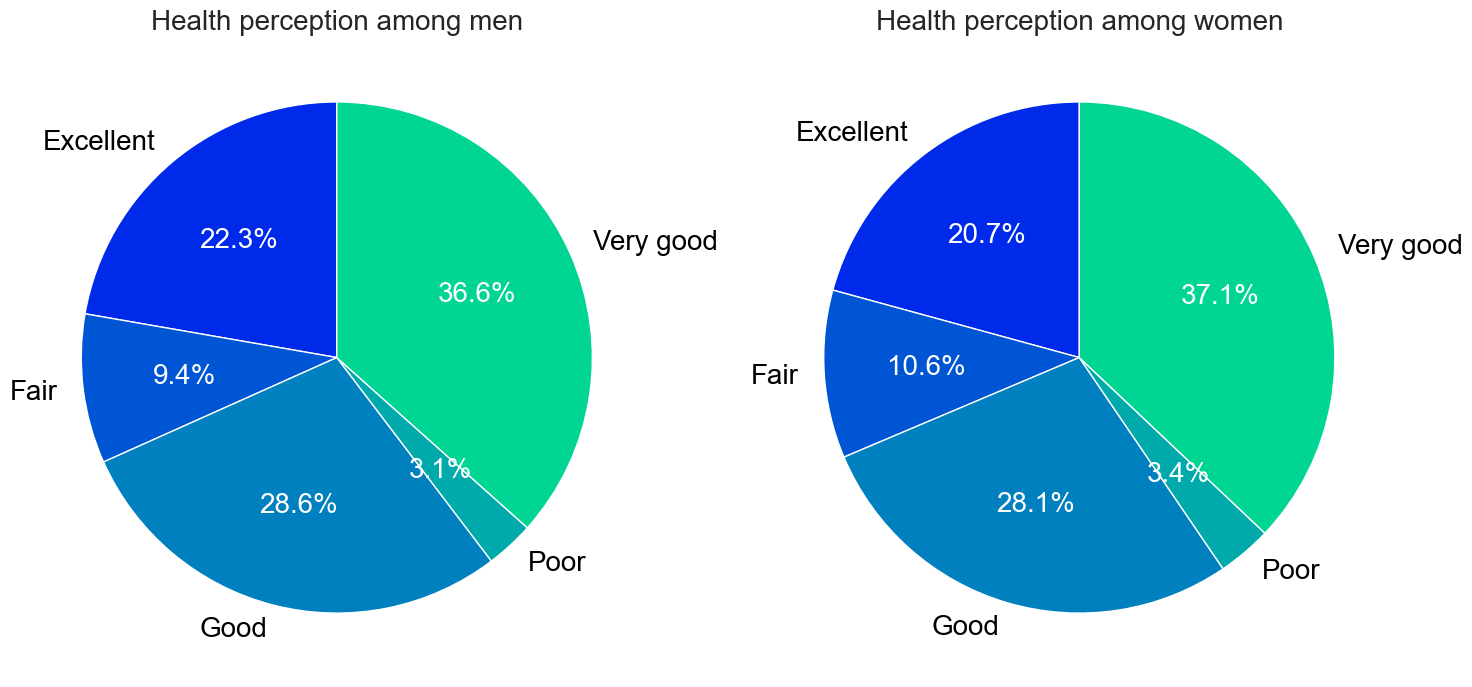

In [40]:
# Comparison of health perception between men and women/diagram
crosstab_data_gender_health = pd.crosstab(df_prepared_final['sex'], df_prepared_final['general_health'])
crosstab_percentages = crosstab_data_gender_health.div(crosstab_data_gender_health.sum(axis=1), axis=0) * 100

male_data = crosstab_percentages.loc['Male']
female_data = crosstab_percentages.loc['Female']

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
colors = sns.color_palette("winter", n_colors=len(crosstab_percentages.columns))

for ax, data, title in zip(axes, [male_data, female_data], ['Health perception among men', 'Health perception among women']):
    wedges, texts, autotexts = ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90,
                                      colors=colors, textprops={'color': 'black', 'fontsize': 20},
                                      wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

    for autotext in autotexts:
        autotext.set_color('white')

    ax.set_title(title, fontsize=20)

plt.tight_layout()
plt.show()

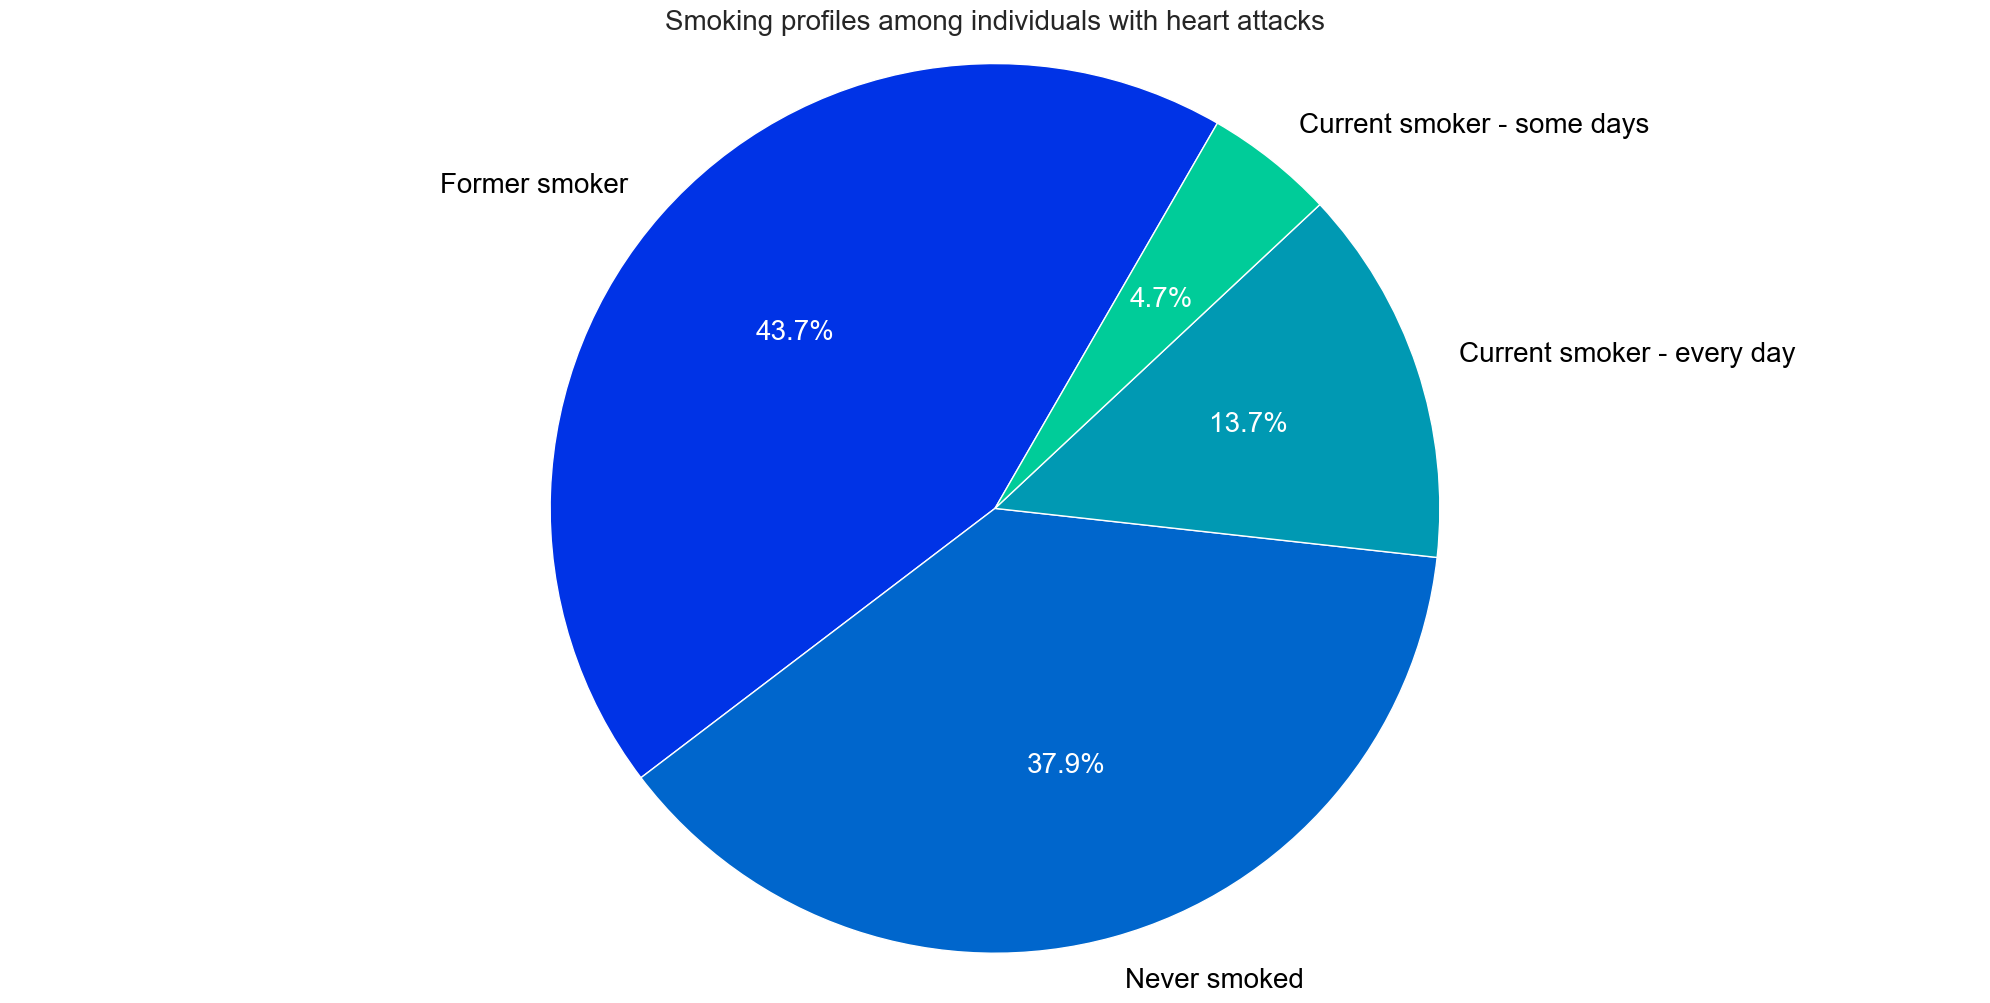

In [41]:
#Smoking profiles among individuals with heart attacks

data_subset = df_prepared_final[['smoking_status', 'heart_attack']]

heart_attack_counts = data_subset[data_subset['heart_attack'] == 'Yes']['smoking_status'].value_counts()

plt.figure(figsize=(20, 10))

colors = sns.color_palette('winter', n_colors=len(heart_attack_counts))

_, texts, autotexts = plt.pie(heart_attack_counts, labels=heart_attack_counts.index, autopct='%1.1f%%', startangle=60, colors=colors,
                               textprops={'color': 'black', 'fontsize': 20},
                              wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

for autotext in autotexts:
    autotext.set_color('white')

plt.title("Smoking profiles among individuals with heart attacks", fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

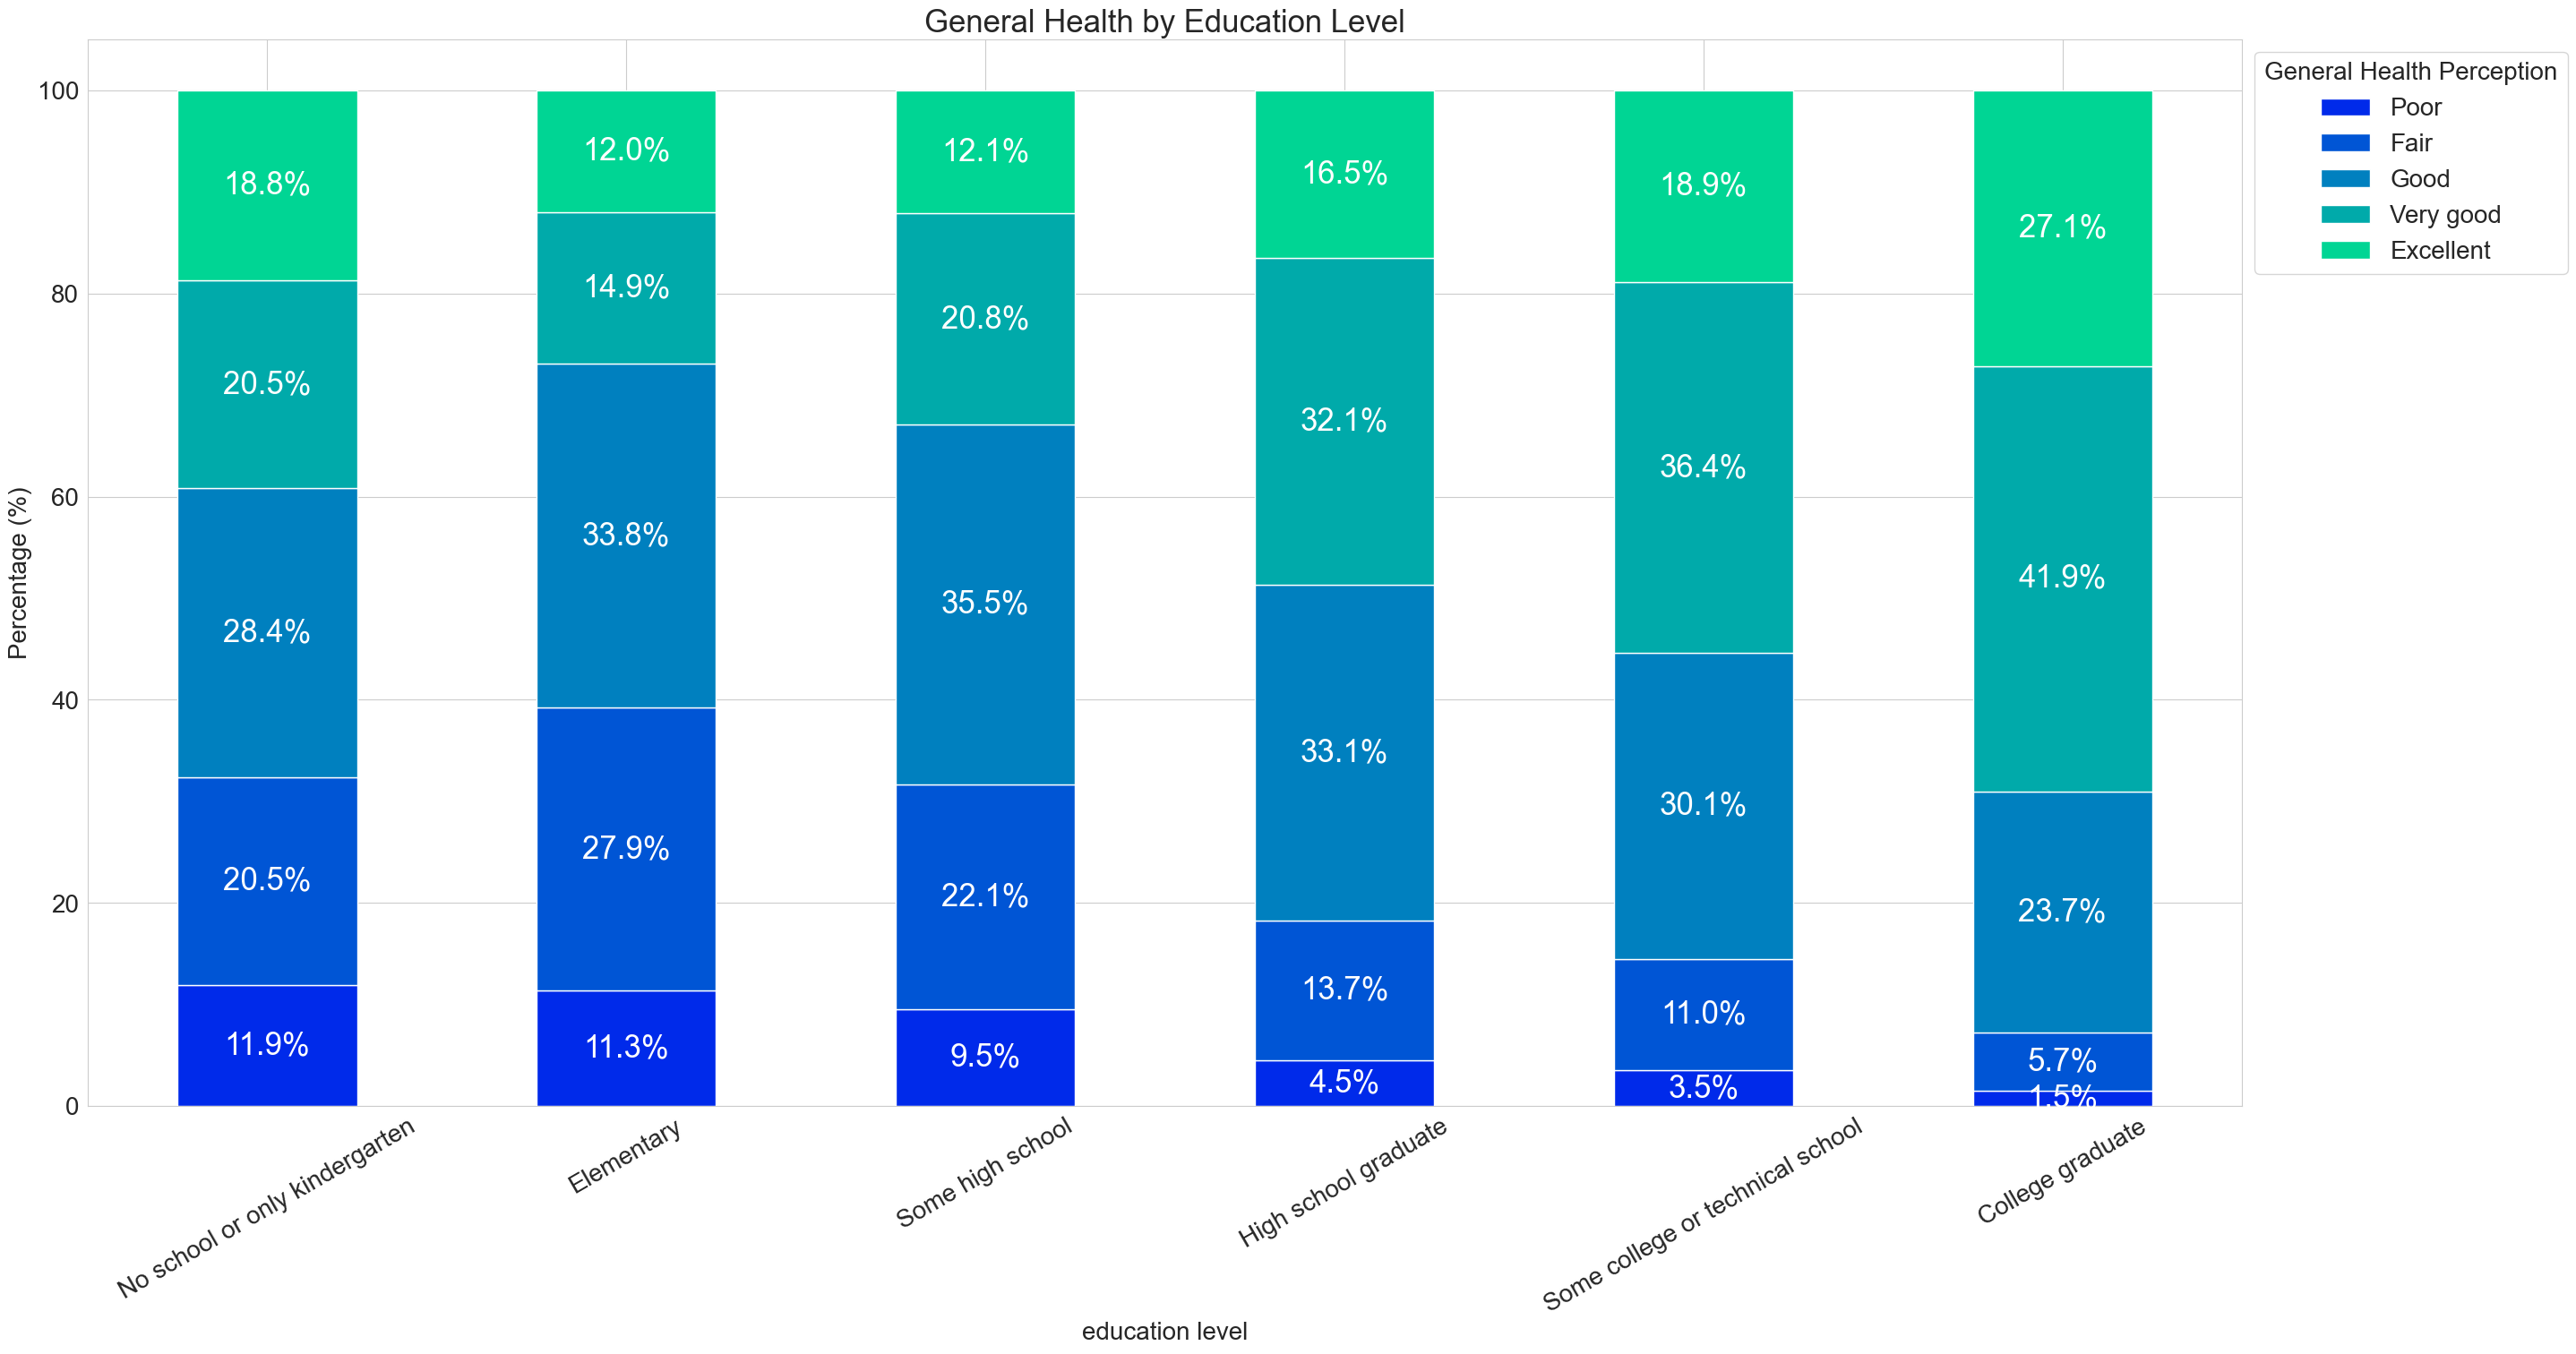

In [42]:
#Create the cross-tabulation to get the total count of people in each income group
education_order = [
    'No school or only kindergarten',
    'Elementary',
    'Some high school',
    'High school graduate',
    'Some college or technical school',
    'College graduate'
] 
crosstab_education_generalhealth = pd.crosstab(df_prepared_final['education_level'], df_prepared_final['general_health'])
crosstab_education_generalhealth = crosstab_education_generalhealth.reindex(education_order)

#Calculate the percentages for each category in the new cross-tabulation
stacked_data_income = crosstab_education_generalhealth.div(crosstab_education_generalhealth.sum(axis = 1), axis = 0) * 100

#New order for the 'general_health' categories and reorder DataFrame based on that
new_health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
stacked_data_income_reordered = stacked_data_income[new_health_order]

#Reverse the color palette for the stacked bar chart
palette = sns.color_palette('winter', len(new_health_order))

#Plot the reordered stacked bar chart with reversed color palette
ax = stacked_data_income_reordered.plot(kind = 'bar', stacked = True, figsize = (25, 15), color = palette)
plt.xlabel('education level', fontsize=20)
plt.ylabel('Percentage (%)', fontsize=20)
plt.title('General Health by Education Level', fontsize = 25)

#Add percentage annotations on each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha = 'center', va = 'center', fontsize = 25, color = 'white')

plt.tight_layout()
plt.legend(title='General Health Perception', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=20, title_fontsize=20)
plt.xticks(rotation=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()



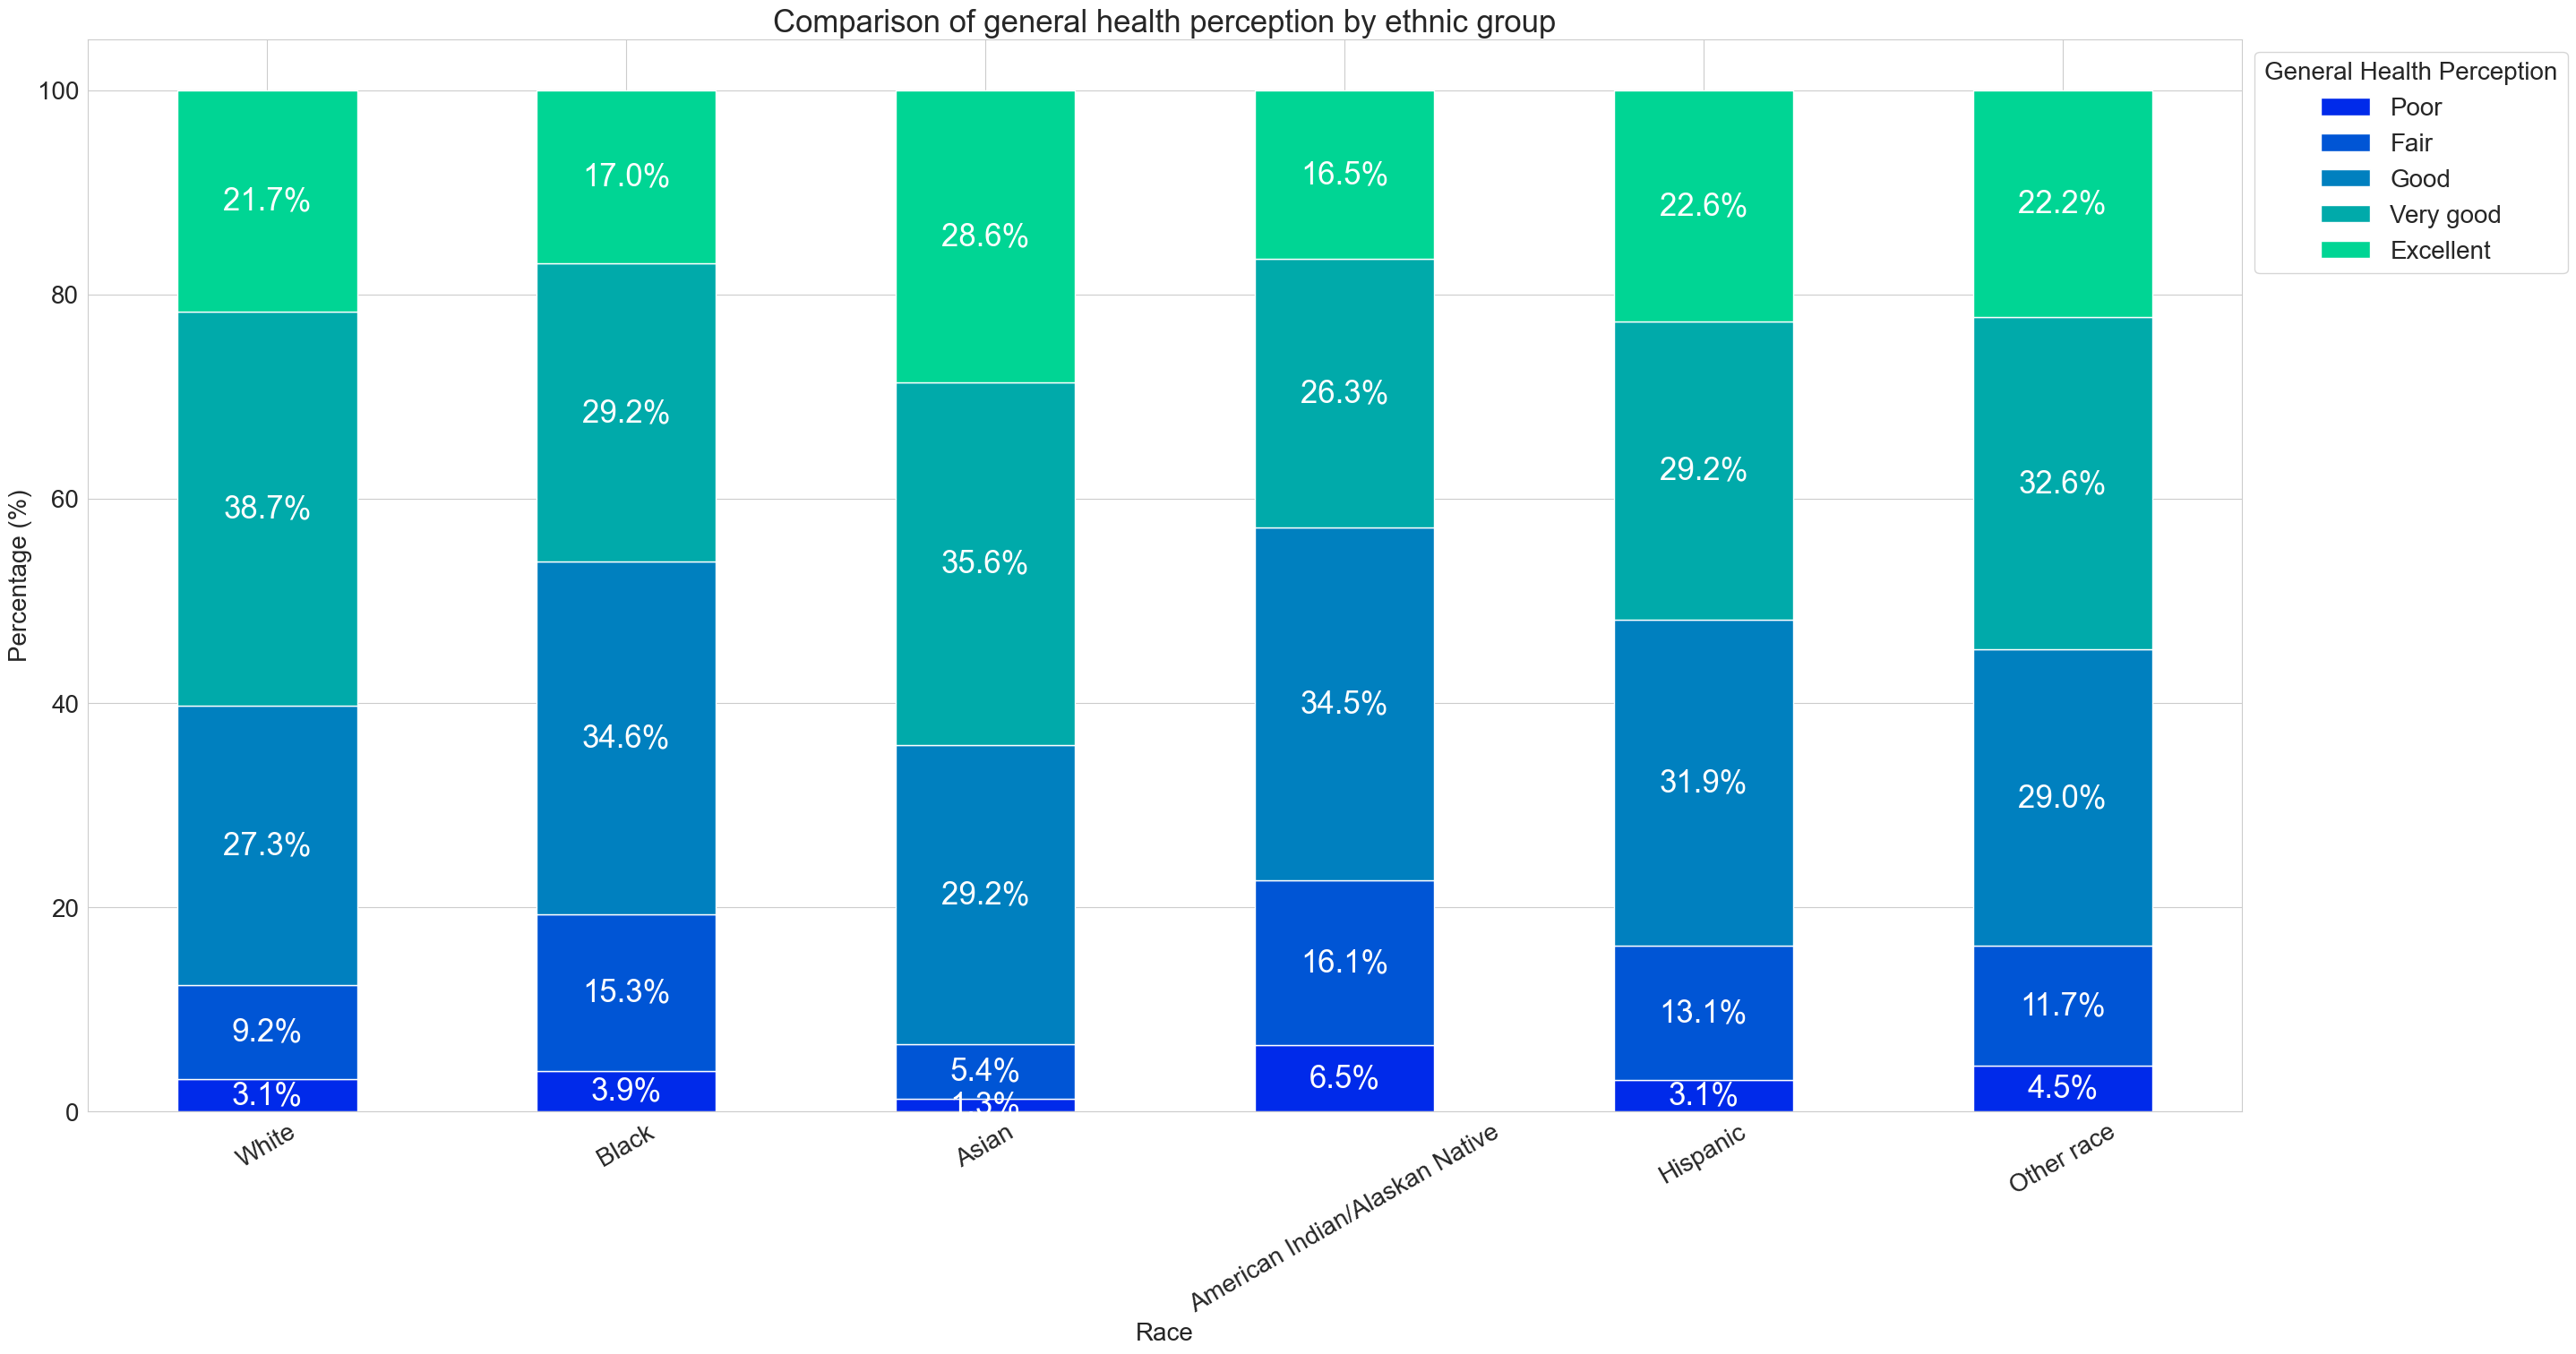

In [43]:
#Create the cross-tabulation to get the total count of people in each income group

crosstab_racehealth = pd.crosstab(df_prepared_final['race'], df_prepared_final['general_health'])
#crosstab_education_generalhealth = crosstab_education_generalhealth.reindex(education_order)

#Calculate the percentages for each category in the new cross-tabulation
stacked_data_racehealth = crosstab_racehealth.div(crosstab_racehealth.sum(axis = 1), axis = 0) * 100

#New order for the 'general_health' categories and reorder DataFrame based on that
new_health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
stacked_data_income_reordered = stacked_data_racehealth[new_health_order]

#Reverse the color palette for the stacked bar chart
palette = sns.color_palette('winter', len(new_health_order))

#Plot the reordered stacked bar chart with reversed color palette
ax = stacked_data_income_reordered.plot(kind = 'bar', stacked = True, figsize = (25, 15), color = palette)
plt.xlabel('Race', fontsize = 20)
plt.ylabel('Percentage (%)', fontsize = 20)
plt.title('Comparison of general health perception by ethnic group', fontsize = 25)

#Add percentage annotations on each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha = 'center', va = 'center', fontsize = 25, color = 'white')

plt.tight_layout()
plt.legend(title='General Health Perception', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=20, title_fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=30)
plt.show()

### 6. Multivariate Analysis

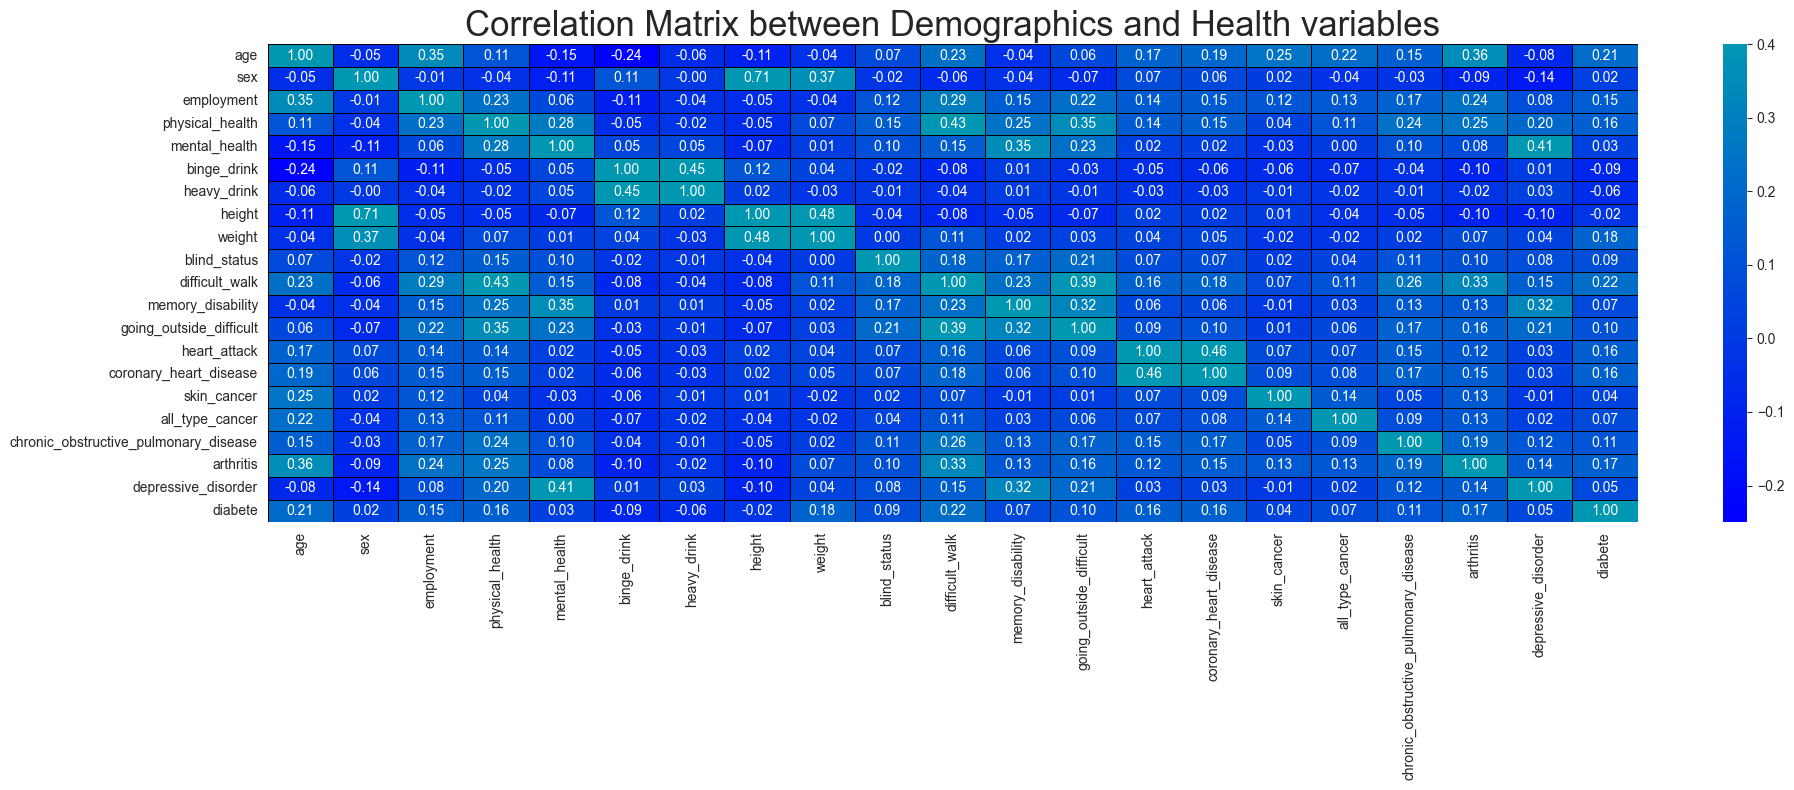

In [44]:
# Correlation Matrix between Demographics and Health variables

df_matrice3 = df_prepared_final[['age', 'sex', 'employment', 'physical_health', 'mental_health', 'binge_drink', 'heavy_drink', 'height', 'weight', 'blind_status', 'difficult_walk', 
                                 'memory_disability', 'going_outside_difficult', 'heart_attack', 'coronary_heart_disease', 'skin_cancer', 'all_type_cancer', 
                                 'chronic_obstructive_pulmonary_disease', 'arthritis', 'depressive_disorder', 'diabete']]

label_encoder = LabelEncoder()
df_matrice3_encoded = df_matrice3.apply(label_encoder.fit_transform)
corr_matrix3 = df_matrice3_encoded.corr()

plt.figure(figsize = (20, 8))
sns.heatmap(corr_matrix3, annot = True, cmap = 'winter', fmt = '.2f', vmin = -0.25, vmax = 0.4, center = 0.3, square = False, linewidths = 0.5, linecolor = 'black')
plt.title("Correlation Matrix between Demographics and Health variables", fontsize = 25)
plt.xticks(rotation = 90) 
plt.tight_layout()
plt.show()

### 7. Machine Learning

We are transitioning to the Machine Learning segment. We've chosen to carry out this entire section using Dataiku, a highly suitable no-code tool for this purpose. As a reminder, our objective is to predict the onset of diseases based on our dataset.
In the provided image, we have a workflow detailing the various stages of our dataset segmentation and the implementation of machine learning models.
For clarity, I'd advise following the color-coded circles. The blue circle contains our input dataset. 
Following some intermediate steps, we generate two datasets, indicated by the green circles: one for model training and another containing data to be predicted. We'll apply our previously established models to this prediction dataset to determine their accuracy.

The red circles showcase our diverse models, each using a varying number of features based on their significance.
Lastly, the yellow circles display prediction data for each model.
This schematic is specific to the pathology of diabetes. Given that we are studying 11 diseases, this workflow is replicated 11 times to accommodate all pathologies.

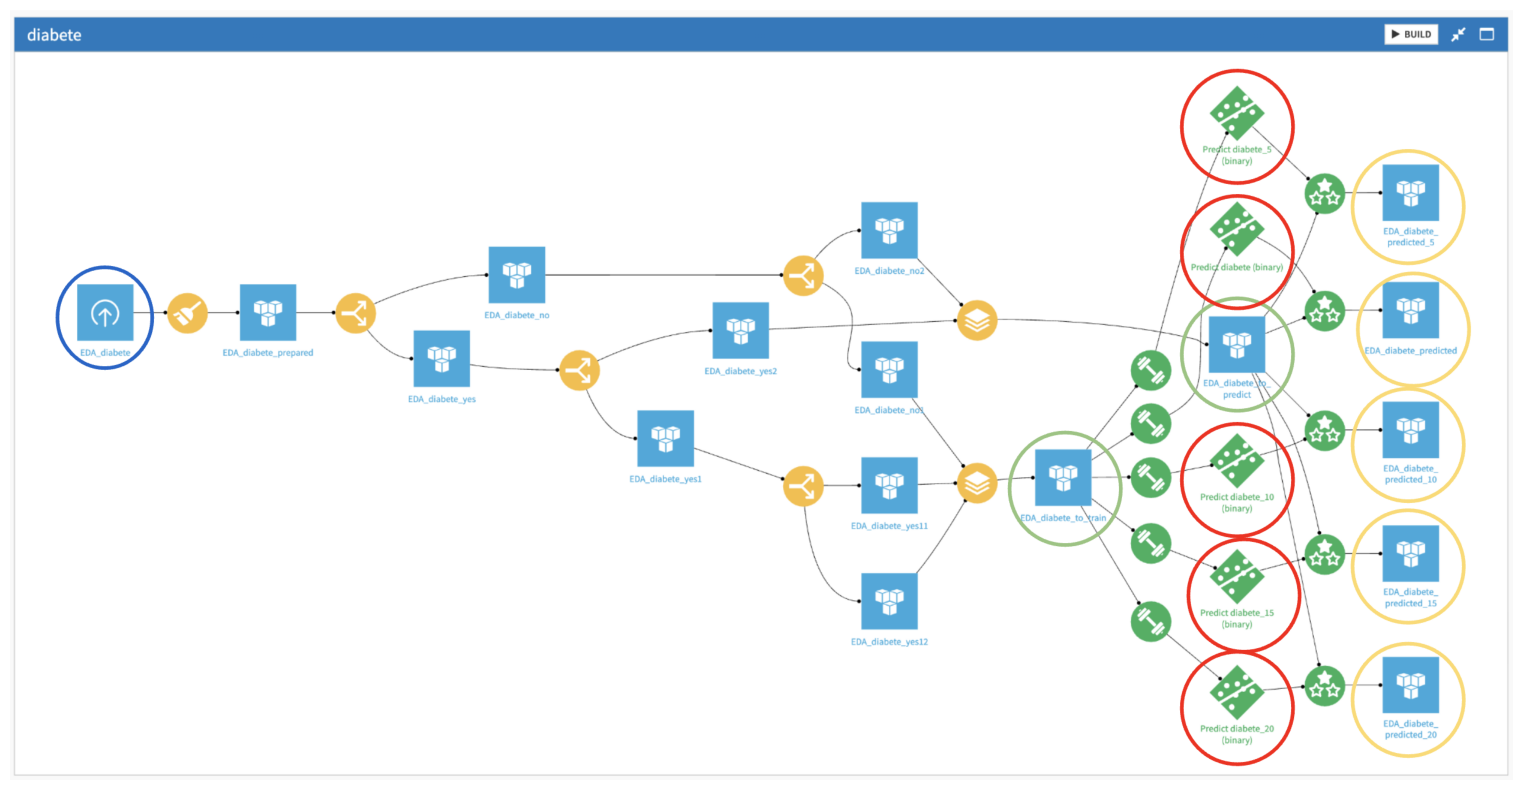

In [53]:
img = mpimg.imread('/Users/arvind.b/Desktop/Capture d’écran 2023-09-16 à 15.57.47.png')
plt.figure(figsize=(25, 8))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()



Now, let's transition to the results. In this table, we have outlined the following for our various diseases:

- The most efficient model.
- The F1 score, which is the metric we've chosen for each of our models. This parameter is particularly valuable in our scenario since it minimizes the number of false negatives, a crucial aspect in healthcare. For instance, we do not want the model predicting that an individual who should have the disease will not have it.
- The Feature Handling, showcasing the top features we decided to retain.
- The number of observations used. Given our dataset's imbalanced nature, we had to down-sample.
- Lastly, the accurate prediction score. We observe that the results are generally commendable. However, for some diseases, there's a need to further fine-tune hyperparameters and possibly include more data in our sample.

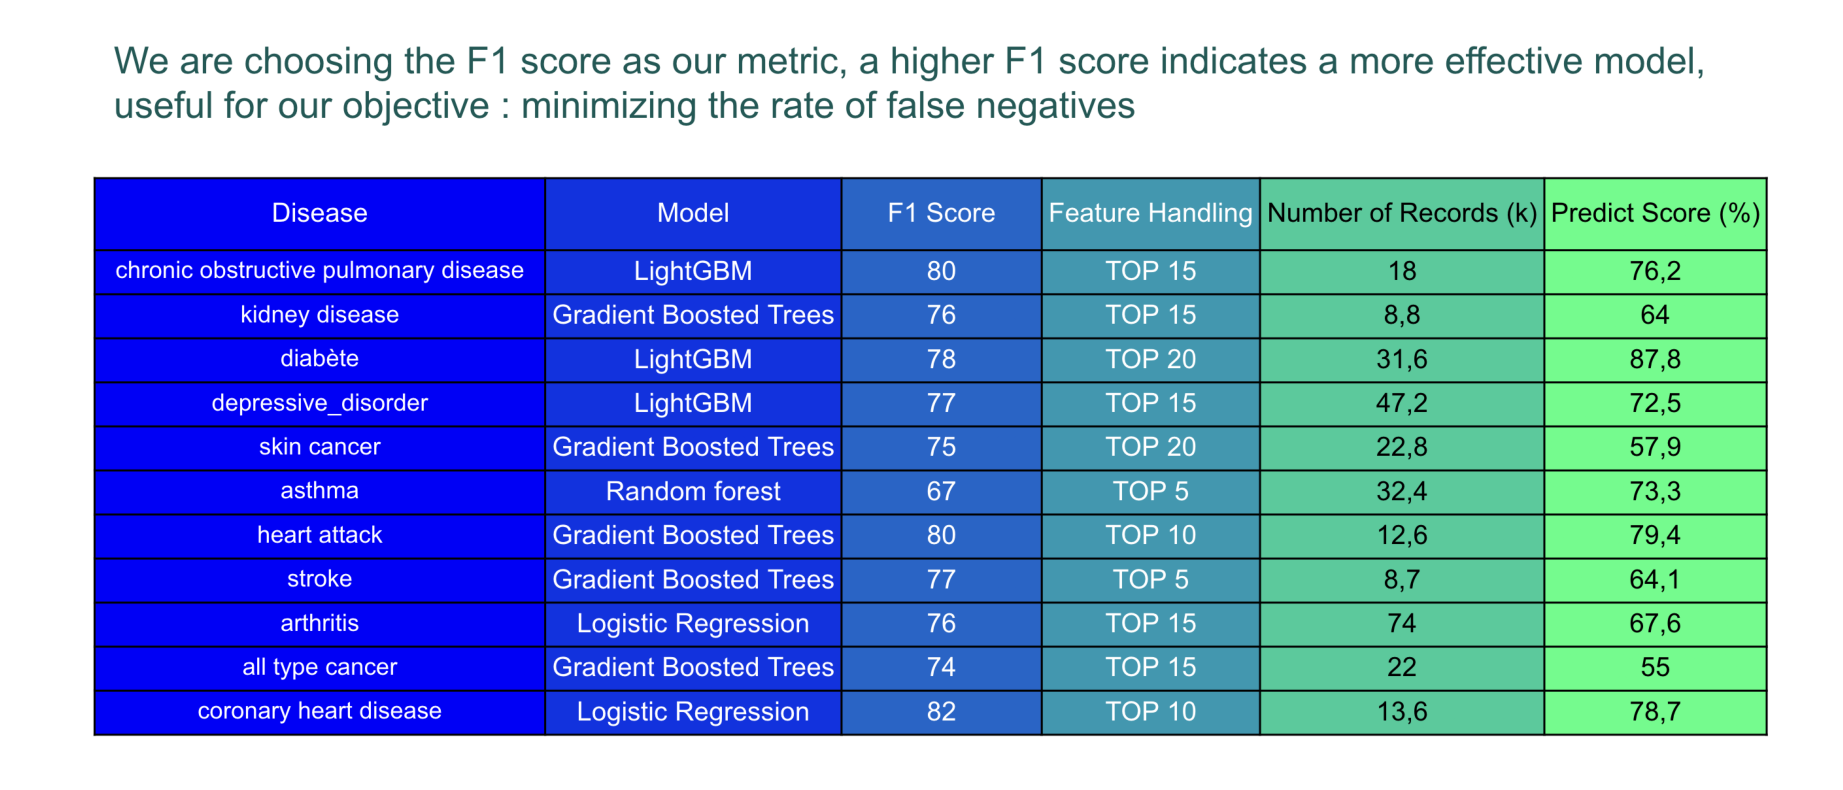

In [52]:
img = mpimg.imread('/Users/arvind.b/Desktop/Capture d’écran 2023-09-16 à 15.59.40.png')
plt.figure(figsize=(25, 8))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()

### 8. Dashboard

### 9. Conclusion

In conclusion, this project has been a substantial learning experience, enabling us to apply a vast portion of what we've acquired throughout the bootcamp.
Regarding machine learning, there's room for enhancement. For instance, having more data or introducing new features reflecting dietary habits or job strain for those employed could prove beneficial.
Another avenue to explore might be comparing our data with last year's BRFSS.
Additionally, we could consider developing an application that offers personalized predictions to our users. Such a tool could also anonymously gather data, further refining our prediction models.